In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

2024-05-24 01:51:58.758122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 01:51:58.758169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 01:51:58.759696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-24 01:51:58.768187: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
# 加載 MNIST 數據
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

# 正規化並重塑數據
# x_train = x_train1[0:100].astype('float32') / 255.
y_test = y_test1 [0:100]
x_test = x_test1[0:100].astype('float32') / 255.
x_train = x_train1.astype('float32') / 255.
# x_test = x_test1.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(100, 784)


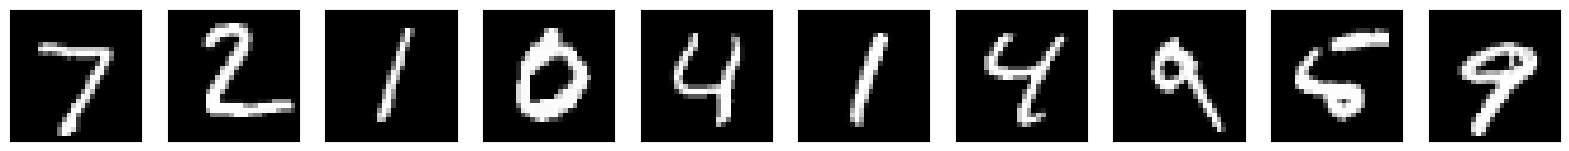

In [13]:
n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 4))
for i in range(n):
    # 顯示原始數據
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Autoencoder

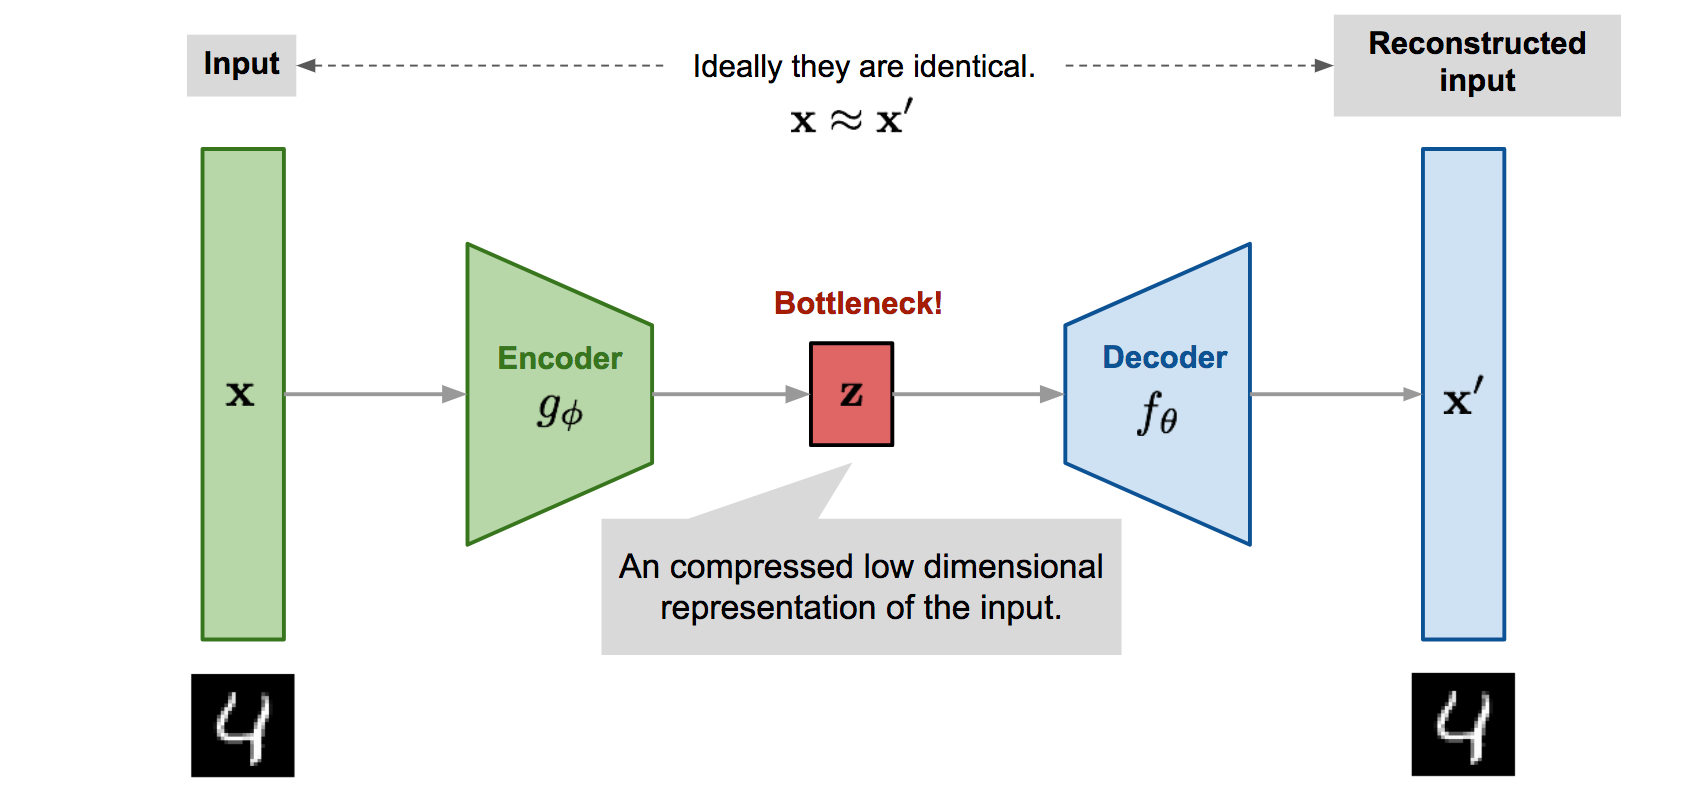



In [14]:
# 定義輸入層的維度
input_dim = x_train.shape[1]  # 784

# 創建輸入層
input_layer = Input(shape=(784,))

# 創建編碼層
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # 編碼後的特徵

# 創建解碼層
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 重建的輸出

# 定義 autoencoder 模型
autoencoder = Model(input_layer, decoded)

# 定義編碼器模型
encoder = Model(input_layer, encoded)

# 定義解碼器模型
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(encoded_input, decoder_layer)


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy')
model_checkpoint = ModelCheckpoint('UNet_Membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
history = autoencoder.fit(x_train, x_train, 
                epochs=200, 
                batch_size=128, 
                shuffle=True, 
                callbacks=[model_checkpoint],
                validation_data=(x_test, x_test))


Epoch 1/200


2024-05-24 01:55:23.570541: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:23.570574: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:23.570580: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:23.570584: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:23.570595: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:23.570600: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:23.570604: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:23.570608: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.2025 - accuracy: 0.0107

2024-05-24 01:55:26.422131: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.422164: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.422168: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.422172: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.422184: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.422188: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.422192: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.422196: W tensorflow/core/grappler/

469/469 [==============================] - ETA: 0s - loss: 0.2003 - accuracy: 0.0105

2024-05-24 01:55:26.881947: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.881980: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.881986: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.881990: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.882002: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.882007: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.882011: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:26.882015: W tensorflow/core/grappler/


Epoch 1: loss improved from inf to 0.20033, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 4s 4ms/step - loss: 0.2003 - accuracy: 0.0105 - val_loss: 0.1420 - val_accuracy: 0.0135
Epoch 2/200
  1/469 [..............................] - ETA: 1s - loss: 0.1404 - accuracy: 0.0312

W0000 00:00:1716486927.237668   12424 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-05-24 01:55:27.377679: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:27.377722: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:27.377730: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:27.377737: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:27.377756: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:27.377764: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:27.377772: W tensorflow/core/grappler/optimizers

469/469 [==============================] - ETA: 0s - loss: 0.1312 - accuracy: 0.0098

W0000 00:00:1716486928.803812   12424 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-05-24 01:55:28.814561: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:28.814618: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:28.814632: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:28.814644: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:28.814676: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:28.814691: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:28.814704: W tensorflow/core/grappler/optimizers


Epoch 2: loss improved from 0.20033 to 0.13124, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 2s 4ms/step - loss: 0.1312 - accuracy: 0.0098 - val_loss: 0.1201 - val_accuracy: 0.0103
Epoch 3/200
447/469 [===========================>..] - ETA: 0s - loss: 0.1170 - accuracy: 0.0112
Epoch 3: loss improved from 0.13124 to 0.11679, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.1168 - accuracy: 0.0111 - val_loss: 0.1103 - val_accuracy: 0.0116
Epoch 4/200
 23/469 [>.............................] - ETA: 1s - loss: 0.1120 - accuracy: 0.0095

2024-05-24 01:55:30.182878: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:30.182913: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:30.182918: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:30.182922: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:30.182935: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:30.182940: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:30.182945: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:30.182949: W tensorflow/core/grappler/

445/469 [===========================>..] - ETA: 0s - loss: 0.1096 - accuracy: 0.0106
Epoch 4: loss improved from 0.11679 to 0.10948, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.1095 - accuracy: 0.0106 - val_loss: 0.1056 - val_accuracy: 0.0107
Epoch 5/200
 26/469 [>.............................] - ETA: 0s - loss: 0.1076 - accuracy: 0.0162

2024-05-24 01:55:31.350041: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:31.350075: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:31.350080: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:31.350083: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:31.350096: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:31.350101: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:31.350106: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:31.350110: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.1052 - accuracy: 0.0111
Epoch 5: loss improved from 0.10948 to 0.10510, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.0111 - val_loss: 0.1020 - val_accuracy: 0.0104
Epoch 6/200
 25/469 [>.............................] - ETA: 0s - loss: 0.1022 - accuracy: 0.0094

2024-05-24 01:55:32.437015: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:32.437053: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:32.437058: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:32.437062: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:32.437075: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:32.437081: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:32.437085: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:32.437089: W tensorflow/core/grappler/

447/469 [===========================>..] - ETA: 0s - loss: 0.1016 - accuracy: 0.0117
Epoch 6: loss improved from 0.10510 to 0.10160, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.0116 - val_loss: 0.0990 - val_accuracy: 0.0113
Epoch 7/200
 26/469 [>.............................] - ETA: 0s - loss: 0.1003 - accuracy: 0.0117

2024-05-24 01:55:33.591396: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:33.591430: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:33.591435: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:33.591439: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:33.591451: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:33.591456: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:33.591460: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:33.591464: W tensorflow/core/grappler/

448/469 [===========================>..] - ETA: 0s - loss: 0.0991 - accuracy: 0.0119
Epoch 7: loss improved from 0.10160 to 0.09898, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.0120 - val_loss: 0.0965 - val_accuracy: 0.0113
Epoch 8/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0978 - accuracy: 0.0117    

2024-05-24 01:55:34.698663: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:34.698696: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:34.698701: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:34.698705: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:34.698717: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:34.698722: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:34.698726: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:34.698730: W tensorflow/core/grappler/

458/469 [============================>.] - ETA: 0s - loss: 0.0971 - accuracy: 0.0124
Epoch 8: loss improved from 0.09898 to 0.09702, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.0124 - val_loss: 0.0950 - val_accuracy: 0.0146
Epoch 9/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0962 - accuracy: 0.0137

2024-05-24 01:55:35.828367: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:35.828401: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:35.828405: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:35.828409: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:35.828422: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:35.828427: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:35.828432: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:35.828436: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0956 - accuracy: 0.0130
Epoch 9: loss improved from 0.09702 to 0.09553, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.0130 - val_loss: 0.0939 - val_accuracy: 0.0146
Epoch 10/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0952 - accuracy: 0.0125

2024-05-24 01:55:36.918578: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:36.918615: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:36.918619: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:36.918623: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:36.918636: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:36.918642: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:36.918646: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:36.918651: W tensorflow/core/grappler/

456/469 [============================>.] - ETA: 0s - loss: 0.0942 - accuracy: 0.0126
Epoch 10: loss improved from 0.09553 to 0.09420, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.0126 - val_loss: 0.0926 - val_accuracy: 0.0119
Epoch 11/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0934 - accuracy: 0.0128    

2024-05-24 01:55:38.004705: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:38.004733: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:38.004738: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:38.004742: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:38.004754: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:38.004759: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:38.004763: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:38.004768: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0929 - accuracy: 0.0125
Epoch 11: loss improved from 0.09420 to 0.09286, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.0127 - val_loss: 0.0912 - val_accuracy: 0.0136
Epoch 12/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0923 - accuracy: 0.0111

2024-05-24 01:55:39.094847: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:39.094878: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:39.094883: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:39.094887: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:39.094899: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:39.094905: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:39.094909: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:39.094913: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0916 - accuracy: 0.0130
Epoch 12: loss improved from 0.09286 to 0.09163, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.0130 - val_loss: 0.0900 - val_accuracy: 0.0149
Epoch 13/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0906 - accuracy: 0.0129

2024-05-24 01:55:40.185968: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:40.186002: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:40.186007: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:40.186011: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:40.186023: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:40.186028: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:40.186032: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:40.186036: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0906 - accuracy: 0.0129
Epoch 13: loss improved from 0.09163 to 0.09062, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.0128 - val_loss: 0.0893 - val_accuracy: 0.0145
Epoch 14/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0894 - accuracy: 0.0150

2024-05-24 01:55:41.264040: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:41.264070: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:41.264074: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:41.264078: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:41.264090: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:41.264095: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:41.264099: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:41.264103: W tensorflow/core/grappler/

460/469 [============================>.] - ETA: 0s - loss: 0.0899 - accuracy: 0.0127
Epoch 14: loss improved from 0.09062 to 0.08985, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.0126 - val_loss: 0.0886 - val_accuracy: 0.0102
Epoch 15/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0896 - accuracy: 0.0093

2024-05-24 01:55:42.350349: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:42.350383: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:42.350388: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:42.350392: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:42.350404: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:42.350409: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:42.350413: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:42.350417: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0890 - accuracy: 0.0134
Epoch 15: loss improved from 0.08985 to 0.08898, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.0133 - val_loss: 0.0878 - val_accuracy: 0.0147
Epoch 16/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0885 - accuracy: 0.0144

2024-05-24 01:55:43.439014: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:43.439049: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:43.439053: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:43.439057: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:43.439070: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:43.439076: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:43.439080: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:43.439084: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0883 - accuracy: 0.0134
Epoch 16: loss improved from 0.08898 to 0.08827, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.0134 - val_loss: 0.0868 - val_accuracy: 0.0112
Epoch 17/200
 27/469 [>.............................] - ETA: 0s - loss: 0.0871 - accuracy: 0.0177

2024-05-24 01:55:44.524149: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:44.524183: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:44.524188: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:44.524191: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:44.524205: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:44.524210: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:44.524215: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:44.524219: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0875 - accuracy: 0.0139
Epoch 17: loss improved from 0.08827 to 0.08749, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.0138 - val_loss: 0.0865 - val_accuracy: 0.0133
Epoch 18/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0864 - accuracy: 0.0109    

2024-05-24 01:55:45.613338: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:45.613373: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:45.613377: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:45.613381: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:45.613394: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:45.613399: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:45.613404: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:45.613408: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0869 - accuracy: 0.0124
Epoch 18: loss improved from 0.08749 to 0.08684, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.0125 - val_loss: 0.0857 - val_accuracy: 0.0129
Epoch 19/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0862 - accuracy: 0.0134

2024-05-24 01:55:46.704487: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:46.704521: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:46.704525: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:46.704529: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:46.704543: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:46.704548: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:46.704552: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:46.704556: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0862 - accuracy: 0.0129
Epoch 19: loss improved from 0.08684 to 0.08621, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.0129 - val_loss: 0.0852 - val_accuracy: 0.0151
Epoch 20/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0864 - accuracy: 0.0144

2024-05-24 01:55:47.798113: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:47.798147: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:47.798152: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:47.798156: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:47.798169: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:47.798174: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:47.798179: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:47.798183: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0857 - accuracy: 0.0129
Epoch 20: loss improved from 0.08621 to 0.08570, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.0129 - val_loss: 0.0847 - val_accuracy: 0.0140
Epoch 21/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0854 - accuracy: 0.0175

2024-05-24 01:55:48.892578: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:48.892611: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:48.892616: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:48.892619: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:48.892632: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:48.892637: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:48.892641: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:48.892645: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0852 - accuracy: 0.0130
Epoch 21: loss improved from 0.08570 to 0.08520, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.0130 - val_loss: 0.0846 - val_accuracy: 0.0127
Epoch 22/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0855 - accuracy: 0.0103

2024-05-24 01:55:49.987400: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:49.987434: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:49.987439: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:49.987443: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:49.987455: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:49.987461: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:49.987465: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:49.987469: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0848 - accuracy: 0.0132
Epoch 22: loss improved from 0.08520 to 0.08477, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.0132 - val_loss: 0.0838 - val_accuracy: 0.0153
Epoch 23/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0847 - accuracy: 0.0132

2024-05-24 01:55:51.082551: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:51.082584: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:51.082589: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:51.082593: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:51.082606: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:51.082611: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:51.082615: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:51.082619: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0844 - accuracy: 0.0129
Epoch 23: loss improved from 0.08477 to 0.08436, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.0129 - val_loss: 0.0833 - val_accuracy: 0.0135
Epoch 24/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0847 - accuracy: 0.0132

2024-05-24 01:55:52.173708: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:52.173741: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:52.173746: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:52.173749: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:52.173762: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:52.173768: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:52.173772: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:52.173776: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0840 - accuracy: 0.0135
Epoch 24: loss improved from 0.08436 to 0.08403, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.0138 - val_loss: 0.0832 - val_accuracy: 0.0117
Epoch 25/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0842 - accuracy: 0.0135

2024-05-24 01:55:53.264505: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:53.264537: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:53.264541: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:53.264545: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:53.264558: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:53.264563: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:53.264567: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:53.264571: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0837 - accuracy: 0.0133
Epoch 25: loss improved from 0.08403 to 0.08368, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.0132 - val_loss: 0.0829 - val_accuracy: 0.0154
Epoch 26/200
  1/469 [..............................] - ETA: 1s - loss: 0.0884 - accuracy: 0.0156

2024-05-24 01:55:54.395241: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:54.395274: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:54.395279: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:54.395283: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:54.395295: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:54.395300: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:54.395305: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:54.395309: W tensorflow/core/grappler/

446/469 [===========================>..] - ETA: 0s - loss: 0.0833 - accuracy: 0.0135
Epoch 26: loss improved from 0.08368 to 0.08333, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.0136 - val_loss: 0.0827 - val_accuracy: 0.0122
Epoch 27/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0831 - accuracy: 0.0153

2024-05-24 01:55:55.541874: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:55.541909: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:55.541914: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:55.541918: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:55.541931: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:55.541936: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:55.541940: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:55.541944: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0830 - accuracy: 0.0139
Epoch 27: loss improved from 0.08333 to 0.08304, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.0138 - val_loss: 0.0826 - val_accuracy: 0.0157
Epoch 28/200
  1/469 [..............................] - ETA: 2s - loss: 0.0827 - accuracy: 0.0078

2024-05-24 01:55:56.650733: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:56.650772: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:56.650777: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:56.650781: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:56.650795: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:56.650800: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:56.650804: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:56.650809: W tensorflow/core/grappler/

467/469 [============================>.] - ETA: 0s - loss: 0.0828 - accuracy: 0.0142
Epoch 28: loss improved from 0.08304 to 0.08278, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.0142 - val_loss: 0.0820 - val_accuracy: 0.0148
Epoch 29/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0823 - accuracy: 0.0147

2024-05-24 01:55:57.774903: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:57.774937: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:57.774942: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:57.774946: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:57.774958: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:57.774963: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:57.774967: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:57.774972: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0825 - accuracy: 0.0140
Epoch 29: loss improved from 0.08278 to 0.08247, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.0138 - val_loss: 0.0818 - val_accuracy: 0.0125
Epoch 30/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0819 - accuracy: 0.0141    

2024-05-24 01:55:58.872405: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:58.872440: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:58.872445: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:58.872449: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:58.872462: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:58.872468: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:58.872472: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:55:58.872476: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.0143
Epoch 30: loss improved from 0.08247 to 0.08229, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.0143 - val_loss: 0.0819 - val_accuracy: 0.0126
Epoch 31/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0824 - accuracy: 0.0144

2024-05-24 01:56:00.009035: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:00.009067: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:00.009072: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:00.009076: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:00.009089: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:00.009094: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:00.009099: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:00.009103: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0820 - accuracy: 0.0140
Epoch 31: loss improved from 0.08229 to 0.08204, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.0140 - val_loss: 0.0813 - val_accuracy: 0.0152
Epoch 32/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0814 - accuracy: 0.0108

2024-05-24 01:56:01.107373: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:01.107410: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:01.107415: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:01.107419: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:01.107432: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:01.107437: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:01.107442: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:01.107447: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0819 - accuracy: 0.0146
Epoch 32: loss improved from 0.08204 to 0.08189, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.0147 - val_loss: 0.0816 - val_accuracy: 0.0148
Epoch 33/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0828 - accuracy: 0.0144    

2024-05-24 01:56:02.198104: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:02.198136: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:02.198141: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:02.198144: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:02.198157: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:02.198162: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:02.198166: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:02.198170: W tensorflow/core/grappler/

457/469 [============================>.] - ETA: 0s - loss: 0.0817 - accuracy: 0.0145
Epoch 33: loss improved from 0.08189 to 0.08166, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.0144 - val_loss: 0.0811 - val_accuracy: 0.0150
Epoch 34/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0807 - accuracy: 0.0144

2024-05-24 01:56:03.286217: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:03.286252: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:03.286257: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:03.286261: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:03.286274: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:03.286280: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:03.286284: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:03.286289: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0815 - accuracy: 0.0150
Epoch 34: loss improved from 0.08166 to 0.08145, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.0149 - val_loss: 0.0810 - val_accuracy: 0.0144
Epoch 35/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0821 - accuracy: 0.0156

2024-05-24 01:56:04.385066: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:04.385100: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:04.385105: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:04.385109: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:04.385121: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:04.385126: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:04.385130: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:04.385134: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0813 - accuracy: 0.0142
Epoch 35: loss improved from 0.08145 to 0.08131, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.0142 - val_loss: 0.0808 - val_accuracy: 0.0138
Epoch 36/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0815 - accuracy: 0.0191

2024-05-24 01:56:05.475147: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:05.475178: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:05.475182: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:05.475186: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:05.475199: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:05.475204: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:05.475209: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:05.475213: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.0146
Epoch 36: loss improved from 0.08131 to 0.08116, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.0146 - val_loss: 0.0810 - val_accuracy: 0.0142
Epoch 37/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0807 - accuracy: 0.0129    

2024-05-24 01:56:06.572324: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:06.572361: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:06.572365: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:06.572369: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:06.572382: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:06.572388: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:06.572392: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:06.572396: W tensorflow/core/grappler/

456/469 [============================>.] - ETA: 0s - loss: 0.0810 - accuracy: 0.0143
Epoch 37: loss improved from 0.08116 to 0.08100, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.0144 - val_loss: 0.0805 - val_accuracy: 0.0148
Epoch 38/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0805 - accuracy: 0.0109

2024-05-24 01:56:07.658310: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:07.658344: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:07.658349: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:07.658353: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:07.658365: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:07.658370: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:07.658374: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:07.658378: W tensorflow/core/grappler/

456/469 [============================>.] - ETA: 0s - loss: 0.0809 - accuracy: 0.0140
Epoch 38: loss improved from 0.08100 to 0.08088, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.0139 - val_loss: 0.0806 - val_accuracy: 0.0171
Epoch 39/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0814 - accuracy: 0.0147

2024-05-24 01:56:08.752498: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:08.752532: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:08.752537: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:08.752541: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:08.752553: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:08.752559: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:08.752563: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:08.752567: W tensorflow/core/grappler/

460/469 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.0149
Epoch 39: loss improved from 0.08088 to 0.08072, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.0148 - val_loss: 0.0805 - val_accuracy: 0.0161
Epoch 40/200
  1/469 [..............................] - ETA: 1s - loss: 0.0850 - accuracy: 0.0000e+00

2024-05-24 01:56:09.836469: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:09.836503: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:09.836507: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:09.836511: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:09.836524: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:09.836530: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:09.836534: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:09.836539: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0806 - accuracy: 0.0144
Epoch 40: loss improved from 0.08072 to 0.08059, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.0144 - val_loss: 0.0802 - val_accuracy: 0.0158
Epoch 41/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0806 - accuracy: 0.0141

2024-05-24 01:56:10.941594: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:10.941623: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:10.941628: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:10.941632: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:10.941644: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:10.941649: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:10.941653: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:10.941657: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0804 - accuracy: 0.0141
Epoch 41: loss improved from 0.08059 to 0.08047, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.0145 - val_loss: 0.0801 - val_accuracy: 0.0180
Epoch 42/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0801 - accuracy: 0.0134

2024-05-24 01:56:12.037545: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:12.037581: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:12.037586: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:12.037590: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:12.037603: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:12.037609: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:12.037613: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:12.037617: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0804 - accuracy: 0.0148
Epoch 42: loss improved from 0.08047 to 0.08035, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.0149 - val_loss: 0.0801 - val_accuracy: 0.0151
Epoch 43/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0804 - accuracy: 0.0138

2024-05-24 01:56:13.132068: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:13.132104: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:13.132109: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:13.132113: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:13.132127: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:13.132132: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:13.132137: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:13.132141: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0802 - accuracy: 0.0144
Epoch 43: loss improved from 0.08035 to 0.08026, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.0144 - val_loss: 0.0800 - val_accuracy: 0.0130
Epoch 44/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0797 - accuracy: 0.0137

2024-05-24 01:56:14.225106: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:14.225141: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:14.225145: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:14.225149: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:14.225163: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:14.225168: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:14.225172: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:14.225176: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0802 - accuracy: 0.0145
Epoch 44: loss improved from 0.08026 to 0.08016, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.0146 - val_loss: 0.0799 - val_accuracy: 0.0179
Epoch 45/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0799 - accuracy: 0.0117

2024-05-24 01:56:15.315534: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:15.315570: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:15.315575: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:15.315579: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:15.315591: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:15.315597: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:15.315602: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:15.315606: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0801 - accuracy: 0.0138
Epoch 45: loss improved from 0.08016 to 0.08007, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.0138 - val_loss: 0.0798 - val_accuracy: 0.0138
Epoch 46/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0798 - accuracy: 0.0135    

2024-05-24 01:56:16.409872: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:16.409907: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:16.409912: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:16.409916: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:16.409929: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:16.409934: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:16.409939: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:16.409943: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0800 - accuracy: 0.0144
Epoch 46: loss improved from 0.08007 to 0.08000, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.0144 - val_loss: 0.0797 - val_accuracy: 0.0171
Epoch 47/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0795 - accuracy: 0.0138

2024-05-24 01:56:17.508370: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:17.508402: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:17.508407: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:17.508411: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:17.508424: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:17.508429: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:17.508433: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:17.508437: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0800 - accuracy: 0.0146
Epoch 47: loss improved from 0.08000 to 0.07995, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.0146 - val_loss: 0.0795 - val_accuracy: 0.0156
Epoch 48/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0797 - accuracy: 0.0174

2024-05-24 01:56:18.599548: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:18.599580: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:18.599585: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:18.599588: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:18.599601: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:18.599606: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:18.599611: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:18.599615: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0798 - accuracy: 0.0145
Epoch 48: loss improved from 0.07995 to 0.07983, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.0146 - val_loss: 0.0795 - val_accuracy: 0.0176
Epoch 49/200
 23/469 [>.............................] - ETA: 1s - loss: 0.0799 - accuracy: 0.0136

2024-05-24 01:56:19.690800: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:19.690834: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:19.690844: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:19.690848: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:19.690861: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:19.690866: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:19.690871: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:19.690874: W tensorflow/core/grappler/

447/469 [===========================>..] - ETA: 0s - loss: 0.0798 - accuracy: 0.0143
Epoch 49: loss improved from 0.07983 to 0.07978, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.0143 - val_loss: 0.0794 - val_accuracy: 0.0159
Epoch 50/200
  1/469 [..............................] - ETA: 1s - loss: 0.0787 - accuracy: 0.0156

2024-05-24 01:56:20.794122: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:20.794156: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:20.794160: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:20.794164: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:20.794176: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:20.794182: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:20.794186: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:20.794190: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0797 - accuracy: 0.0142
Epoch 50: loss improved from 0.07978 to 0.07969, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.0142 - val_loss: 0.0793 - val_accuracy: 0.0150
Epoch 51/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0795 - accuracy: 0.0156

2024-05-24 01:56:21.954810: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:21.954848: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:21.954852: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:21.954856: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:21.954870: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:21.954875: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:21.954880: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:21.954884: W tensorflow/core/grappler/

448/469 [===========================>..] - ETA: 0s - loss: 0.0797 - accuracy: 0.0146
Epoch 51: loss improved from 0.07969 to 0.07964, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.0147 - val_loss: 0.0793 - val_accuracy: 0.0185
Epoch 52/200
 22/469 [>.............................] - ETA: 1s - loss: 0.0797 - accuracy: 0.0170

2024-05-24 01:56:23.058325: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:23.058361: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:23.058366: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:23.058370: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:23.058382: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:23.058388: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:23.058392: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:23.058396: W tensorflow/core/grappler/

445/469 [===========================>..] - ETA: 0s - loss: 0.0796 - accuracy: 0.0146
Epoch 52: loss improved from 0.07964 to 0.07960, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.0147 - val_loss: 0.0798 - val_accuracy: 0.0130
Epoch 53/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0796 - accuracy: 0.0128

2024-05-24 01:56:24.218067: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:24.218099: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:24.218104: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:24.218108: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:24.218121: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:24.218126: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:24.218130: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:24.218134: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0795 - accuracy: 0.0146
Epoch 53: loss improved from 0.07960 to 0.07951, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.0146 - val_loss: 0.0793 - val_accuracy: 0.0143
Epoch 54/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0793 - accuracy: 0.0125

2024-05-24 01:56:25.323348: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:25.323385: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:25.323389: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:25.323393: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:25.323406: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:25.323412: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:25.323416: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:25.323420: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0795 - accuracy: 0.0148
Epoch 54: loss improved from 0.07951 to 0.07946, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.0147 - val_loss: 0.0792 - val_accuracy: 0.0175
Epoch 55/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0794 - accuracy: 0.0147

2024-05-24 01:56:26.458415: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:26.458449: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:26.458454: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:26.458458: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:26.458471: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:26.458476: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:26.458481: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:26.458485: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0794 - accuracy: 0.0147
Epoch 55: loss improved from 0.07946 to 0.07940, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.0146 - val_loss: 0.0792 - val_accuracy: 0.0170
Epoch 56/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0793 - accuracy: 0.0144

2024-05-24 01:56:27.553089: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:27.553119: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:27.553124: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:27.553127: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:27.553140: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:27.553146: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:27.553150: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:27.553154: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0794 - accuracy: 0.0148
Epoch 56: loss improved from 0.07940 to 0.07936, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.0148 - val_loss: 0.0790 - val_accuracy: 0.0150
Epoch 57/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0790 - accuracy: 0.0162    

2024-05-24 01:56:28.649698: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:28.649731: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:28.649736: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:28.649739: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:28.649752: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:28.649757: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:28.649761: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:28.649766: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0793 - accuracy: 0.0147
Epoch 57: loss improved from 0.07936 to 0.07932, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.0146 - val_loss: 0.0790 - val_accuracy: 0.0136
Epoch 58/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0787 - accuracy: 0.0144

2024-05-24 01:56:29.736185: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:29.736219: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:29.736224: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:29.736228: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:29.736241: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:29.736246: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:29.736250: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:29.736255: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0792 - accuracy: 0.0149
Epoch 58: loss improved from 0.07932 to 0.07926, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.0149 - val_loss: 0.0792 - val_accuracy: 0.0141
Epoch 59/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0787 - accuracy: 0.0134    

2024-05-24 01:56:30.826626: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:30.826661: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:30.826666: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:30.826669: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:30.826682: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:30.826687: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:30.826692: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:30.826696: W tensorflow/core/grappler/

457/469 [============================>.] - ETA: 0s - loss: 0.0793 - accuracy: 0.0159
Epoch 59: loss improved from 0.07926 to 0.07924, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.0159 - val_loss: 0.0791 - val_accuracy: 0.0163
Epoch 60/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0789 - accuracy: 0.0150

2024-05-24 01:56:31.909120: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:31.909151: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:31.909156: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:31.909160: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:31.909172: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:31.909178: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:31.909182: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:31.909186: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0791 - accuracy: 0.0152
Epoch 60: loss improved from 0.07924 to 0.07914, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.0152 - val_loss: 0.0794 - val_accuracy: 0.0161
Epoch 61/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0791 - accuracy: 0.0178

2024-05-24 01:56:32.995943: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:32.995974: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:32.995978: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:32.995982: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:32.995994: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:32.995999: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:32.996004: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:32.996008: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0791 - accuracy: 0.0158
Epoch 61: loss improved from 0.07914 to 0.07912, saving model to UNet_Membrane.hdf5


2024-05-24 01:56:34.094754: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:34.094789: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:34.094794: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:34.094798: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:34.094811: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:34.094817: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:34.094821: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:34.094825: W tensorflow/core/grappler/

469/469 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.0158 - val_loss: 0.0788 - val_accuracy: 0.0149
Epoch 62/200
455/469 [============================>.] - ETA: 0s - loss: 0.0791 - accuracy: 0.0152
Epoch 62: loss improved from 0.07912 to 0.07907, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.0151 - val_loss: 0.0791 - val_accuracy: 0.0140
Epoch 63/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0794 - accuracy: 0.0146    

2024-05-24 01:56:35.260475: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:35.260508: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:35.260512: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:35.260516: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:35.260527: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:35.260532: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:35.260536: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:35.260540: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0791 - accuracy: 0.0143
Epoch 63: loss improved from 0.07907 to 0.07905, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.0144 - val_loss: 0.0787 - val_accuracy: 0.0146
Epoch 64/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0785 - accuracy: 0.0201

2024-05-24 01:56:36.352931: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:36.352962: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:36.352966: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:36.352970: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:36.352982: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:36.352987: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:36.352991: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:36.352995: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0790 - accuracy: 0.0150
Epoch 64: loss improved from 0.07905 to 0.07900, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.0149 - val_loss: 0.0789 - val_accuracy: 0.0158
Epoch 65/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0793 - accuracy: 0.0150

2024-05-24 01:56:37.449419: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:37.449453: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:37.449457: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:37.449461: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:37.449474: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:37.449479: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:37.449483: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:37.449487: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0790 - accuracy: 0.0146
Epoch 65: loss improved from 0.07900 to 0.07896, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.0145 - val_loss: 0.0788 - val_accuracy: 0.0142
Epoch 66/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0782 - accuracy: 0.0178

2024-05-24 01:56:38.549638: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:38.549669: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:38.549674: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:38.549678: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:38.549690: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:38.549695: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:38.549700: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:38.549704: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0789 - accuracy: 0.0155
Epoch 66: loss improved from 0.07896 to 0.07894, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.0155 - val_loss: 0.0789 - val_accuracy: 0.0202
Epoch 67/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0788 - accuracy: 0.0180    

2024-05-24 01:56:39.640696: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:39.640728: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:39.640733: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:39.640737: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:39.640749: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:39.640754: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:39.640758: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:39.640762: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0789 - accuracy: 0.0149
Epoch 67: loss improved from 0.07894 to 0.07888, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.0148 - val_loss: 0.0785 - val_accuracy: 0.0160
Epoch 68/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0788 - accuracy: 0.0137

2024-05-24 01:56:40.732269: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:40.732301: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:40.732306: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:40.732310: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:40.732322: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:40.732328: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:40.732333: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:40.732337: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0789 - accuracy: 0.0148
Epoch 68: loss improved from 0.07888 to 0.07885, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.0149 - val_loss: 0.0785 - val_accuracy: 0.0169
Epoch 69/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0788 - accuracy: 0.0204

2024-05-24 01:56:41.833373: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:41.833403: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:41.833407: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:41.833411: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:41.833424: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:41.833428: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:41.833433: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:41.833437: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0788 - accuracy: 0.0155
Epoch 69: loss improved from 0.07885 to 0.07879, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.0154 - val_loss: 0.0787 - val_accuracy: 0.0151
Epoch 70/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0792 - accuracy: 0.0150

2024-05-24 01:56:42.941135: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:42.941173: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:42.941178: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:42.941183: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:42.941197: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:42.941203: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:42.941208: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:42.941212: W tensorflow/core/grappler/

460/469 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.0151
Epoch 70: loss did not improve from 0.07879
469/469 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.0150 - val_loss: 0.0785 - val_accuracy: 0.0135
Epoch 71/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0779 - accuracy: 0.0150

2024-05-24 01:56:44.045912: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:44.045946: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:44.045953: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:44.045958: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:44.045974: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:44.045981: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:44.045987: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:44.045992: W tensorflow/core/grappler/

461/469 [============================>.] - ETA: 0s - loss: 0.0787 - accuracy: 0.0152
Epoch 71: loss improved from 0.07879 to 0.07876, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.0153 - val_loss: 0.0786 - val_accuracy: 0.0154
Epoch 72/200
  1/469 [..............................] - ETA: 1s - loss: 0.0768 - accuracy: 0.0391

2024-05-24 01:56:45.164752: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:45.164793: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:45.164798: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:45.164802: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:45.164816: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:45.164821: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:45.164825: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:45.164829: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0787 - accuracy: 0.0152
Epoch 72: loss improved from 0.07876 to 0.07872, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.0153 - val_loss: 0.0784 - val_accuracy: 0.0137
Epoch 73/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0788 - accuracy: 0.0144

2024-05-24 01:56:46.293150: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:46.293184: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:46.293189: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:46.293193: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:46.293206: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:46.293211: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:46.293215: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:46.293219: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0787 - accuracy: 0.0152
Epoch 73: loss improved from 0.07872 to 0.07869, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.0153 - val_loss: 0.0787 - val_accuracy: 0.0142
Epoch 74/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0784 - accuracy: 0.0153

2024-05-24 01:56:47.395379: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:47.395413: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:47.395417: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:47.395421: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:47.395435: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:47.395440: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:47.395444: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:47.395449: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.0147
Epoch 74: loss improved from 0.07869 to 0.07866, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.0149 - val_loss: 0.0787 - val_accuracy: 0.0186
Epoch 75/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.0169

2024-05-24 01:56:48.534066: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:48.534101: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:48.534105: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:48.534109: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:48.534122: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:48.534127: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:48.534131: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:48.534136: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0786 - accuracy: 0.0152
Epoch 75: loss improved from 0.07866 to 0.07862, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.0152 - val_loss: 0.0782 - val_accuracy: 0.0162
Epoch 76/200
  1/469 [..............................] - ETA: 2s - loss: 0.0775 - accuracy: 0.0156

2024-05-24 01:56:49.627455: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:49.627485: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:49.627490: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:49.627494: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:49.627507: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:49.627512: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:49.627516: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:49.627520: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.0149
Epoch 76: loss improved from 0.07862 to 0.07858, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.0149 - val_loss: 0.0783 - val_accuracy: 0.0171
Epoch 77/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0791 - accuracy: 0.0131    

2024-05-24 01:56:50.773594: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:50.773627: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:50.773632: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:50.773635: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:50.773647: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:50.773652: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:50.773656: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:50.773660: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.0151
Epoch 77: loss improved from 0.07858 to 0.07856, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.0151 - val_loss: 0.0786 - val_accuracy: 0.0151
Epoch 78/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0785 - accuracy: 0.0156

2024-05-24 01:56:51.863676: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:51.863711: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:51.863716: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:51.863720: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:51.863732: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:51.863737: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:51.863741: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:51.863745: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.0149
Epoch 78: loss improved from 0.07856 to 0.07855, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.0150 - val_loss: 0.0787 - val_accuracy: 0.0154
Epoch 79/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0787 - accuracy: 0.0166

2024-05-24 01:56:52.960178: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:52.960209: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:52.960214: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:52.960218: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:52.960230: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:52.960235: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:52.960239: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:52.960243: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.0149
Epoch 79: loss did not improve from 0.07855
469/469 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.0151 - val_loss: 0.0784 - val_accuracy: 0.0161
Epoch 80/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0789 - accuracy: 0.0163

2024-05-24 01:56:54.048102: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:54.048138: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:54.048143: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:54.048147: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:54.048160: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:54.048165: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:54.048169: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:54.048173: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0785 - accuracy: 0.0155
Epoch 80: loss improved from 0.07855 to 0.07850, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.0153 - val_loss: 0.0785 - val_accuracy: 0.0135
Epoch 81/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0782 - accuracy: 0.0120    

2024-05-24 01:56:55.114333: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:55.114366: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:55.114371: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:55.114375: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:55.114386: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:55.114391: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:55.114395: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:55.114399: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0785 - accuracy: 0.0151
Epoch 81: loss improved from 0.07850 to 0.07845, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.0151 - val_loss: 0.0782 - val_accuracy: 0.0156
Epoch 82/200
 24/469 [>.............................] - ETA: 1s - loss: 0.0780 - accuracy: 0.0146

2024-05-24 01:56:56.214891: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:56.214926: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:56.214931: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:56.214935: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:56.214947: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:56.214952: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:56.214956: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:56.214960: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0785 - accuracy: 0.0148
Epoch 82: loss did not improve from 0.07845
469/469 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.0149 - val_loss: 0.0783 - val_accuracy: 0.0162
Epoch 83/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0781 - accuracy: 0.0135

2024-05-24 01:56:57.307652: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:57.307684: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:57.307688: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:57.307692: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:57.307704: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:57.307709: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:57.307713: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:57.307717: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0784 - accuracy: 0.0149
Epoch 83: loss improved from 0.07845 to 0.07839, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.0149 - val_loss: 0.0782 - val_accuracy: 0.0125
Epoch 84/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0778 - accuracy: 0.0150

2024-05-24 01:56:58.363318: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:58.363350: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:58.363355: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:58.363358: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:58.363370: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:58.363375: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:58.363379: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:58.363383: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0784 - accuracy: 0.0145
Epoch 84: loss did not improve from 0.07839
469/469 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.0145 - val_loss: 0.0782 - val_accuracy: 0.0144
Epoch 85/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0786 - accuracy: 0.0159

2024-05-24 01:56:59.457136: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:59.457171: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:59.457175: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:59.457179: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:59.457191: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:59.457196: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:59.457200: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:56:59.457204: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0784 - accuracy: 0.0148
Epoch 85: loss improved from 0.07839 to 0.07837, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.0147 - val_loss: 0.0784 - val_accuracy: 0.0153
Epoch 86/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0790 - accuracy: 0.0153

2024-05-24 01:57:00.519155: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:00.519190: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:00.519195: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:00.519198: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:00.519210: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:00.519215: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:00.519219: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:00.519223: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0784 - accuracy: 0.0152
Epoch 86: loss did not improve from 0.07837
469/469 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.0151 - val_loss: 0.0782 - val_accuracy: 0.0150
Epoch 87/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0784 - accuracy: 0.0177    

2024-05-24 01:57:01.616828: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:01.616869: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:01.616873: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:01.616877: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:01.616889: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:01.616893: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:01.616898: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:01.616902: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.0153
Epoch 87: loss improved from 0.07837 to 0.07834, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.0154 - val_loss: 0.0782 - val_accuracy: 0.0142
Epoch 88/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0786 - accuracy: 0.0134

2024-05-24 01:57:02.685888: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:02.685924: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:02.685929: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:02.685932: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:02.685945: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:02.685950: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:02.685954: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:02.685958: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.0148
Epoch 88: loss improved from 0.07834 to 0.07830, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.0149 - val_loss: 0.0785 - val_accuracy: 0.0143
Epoch 89/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0782 - accuracy: 0.0153    

2024-05-24 01:57:03.774719: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:03.774754: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:03.774758: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:03.774762: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:03.774774: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:03.774779: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:03.774783: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:03.774787: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.0150
Epoch 89: loss improved from 0.07830 to 0.07830, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.0152 - val_loss: 0.0781 - val_accuracy: 0.0146
Epoch 90/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.0172

2024-05-24 01:57:04.865549: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:04.865585: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:04.865590: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:04.865594: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:04.865606: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:04.865611: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:04.865616: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:04.865620: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.0158
Epoch 90: loss improved from 0.07830 to 0.07826, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.0159 - val_loss: 0.0781 - val_accuracy: 0.0137
Epoch 91/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0166

2024-05-24 01:57:05.960072: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:05.960105: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:05.960110: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:05.960114: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:05.960126: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:05.960131: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:05.960135: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:05.960139: W tensorflow/core/grappler/

447/469 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.0152
Epoch 91: loss improved from 0.07826 to 0.07825, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.0151 - val_loss: 0.0780 - val_accuracy: 0.0142
Epoch 92/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0782 - accuracy: 0.0172

2024-05-24 01:57:07.060231: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:07.060268: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:07.060272: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:07.060276: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:07.060289: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:07.060294: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:07.060298: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:07.060302: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.0148
Epoch 92: loss improved from 0.07825 to 0.07824, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.0146 - val_loss: 0.0781 - val_accuracy: 0.0153
Epoch 93/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0784 - accuracy: 0.0132

2024-05-24 01:57:08.165326: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:08.165359: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:08.165364: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:08.165367: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:08.165379: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:08.165384: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:08.165388: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:08.165392: W tensorflow/core/grappler/

464/469 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.0151
Epoch 93: loss improved from 0.07824 to 0.07821, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.0152 - val_loss: 0.0781 - val_accuracy: 0.0143
Epoch 94/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.0153

2024-05-24 01:57:09.343051: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:09.343085: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:09.343090: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:09.343093: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:09.343106: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:09.343111: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:09.343115: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:09.343120: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0782 - accuracy: 0.0153
Epoch 94: loss improved from 0.07821 to 0.07820, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.0153 - val_loss: 0.0779 - val_accuracy: 0.0138
Epoch 95/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.0135

2024-05-24 01:57:10.439923: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:10.439959: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:10.439963: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:10.439967: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:10.439981: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:10.439986: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:10.439990: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:10.439994: W tensorflow/core/grappler/

445/469 [===========================>..] - ETA: 0s - loss: 0.0782 - accuracy: 0.0152
Epoch 95: loss improved from 0.07820 to 0.07817, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.0152 - val_loss: 0.0781 - val_accuracy: 0.0144
Epoch 96/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0781 - accuracy: 0.0156

2024-05-24 01:57:11.599209: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:11.599242: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:11.599246: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:11.599250: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:11.599263: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:11.599268: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:11.599272: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:11.599276: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0782 - accuracy: 0.0148
Epoch 96: loss did not improve from 0.07817
469/469 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.0147 - val_loss: 0.0780 - val_accuracy: 0.0140
Epoch 97/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0778 - accuracy: 0.0174

2024-05-24 01:57:12.698229: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:12.698264: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:12.698268: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:12.698272: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:12.698285: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:12.698290: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:12.698295: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:12.698299: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0781 - accuracy: 0.0152
Epoch 97: loss improved from 0.07817 to 0.07814, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.0152 - val_loss: 0.0778 - val_accuracy: 0.0135
Epoch 98/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0178

2024-05-24 01:57:13.764151: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:13.764186: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:13.764191: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:13.764195: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:13.764207: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:13.764212: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:13.764217: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:13.764221: W tensorflow/core/grappler/

461/469 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.0149
Epoch 98: loss improved from 0.07814 to 0.07812, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.0149 - val_loss: 0.0780 - val_accuracy: 0.0139
Epoch 99/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0159

2024-05-24 01:57:14.894891: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:14.894920: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:14.894925: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:14.894929: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:14.894941: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:14.894946: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:14.894950: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:14.894954: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0781 - accuracy: 0.0150
Epoch 99: loss improved from 0.07812 to 0.07808, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.0151 - val_loss: 0.0779 - val_accuracy: 0.0157
Epoch 100/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0153

2024-05-24 01:57:15.988948: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:15.988979: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:15.988984: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:15.988988: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:15.989000: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:15.989005: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:15.989009: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:15.989013: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0781 - accuracy: 0.0147
Epoch 100: loss did not improve from 0.07808
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.0148 - val_loss: 0.0779 - val_accuracy: 0.0143
Epoch 101/200
  1/469 [..............................] - ETA: 2s - loss: 0.0810 - accuracy: 0.0000e+00

2024-05-24 01:57:17.079169: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:17.079201: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:17.079206: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:17.079209: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:17.079222: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:17.079227: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:17.079232: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:17.079236: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.0149
Epoch 101: loss improved from 0.07808 to 0.07805, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.0148 - val_loss: 0.0780 - val_accuracy: 0.0151
Epoch 102/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0780 - accuracy: 0.0153

2024-05-24 01:57:18.203543: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:18.203578: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:18.203583: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:18.203586: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:18.203598: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:18.203604: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:18.203608: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:18.203612: W tensorflow/core/grappler/

457/469 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.0148
Epoch 102: loss did not improve from 0.07805
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.0149 - val_loss: 0.0782 - val_accuracy: 0.0132
Epoch 103/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0776 - accuracy: 0.0147

2024-05-24 01:57:19.288955: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:19.288988: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:19.288993: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:19.288997: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:19.289009: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:19.289014: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:19.289018: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:19.289022: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.0150
Epoch 103: loss improved from 0.07805 to 0.07805, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.0150 - val_loss: 0.0779 - val_accuracy: 0.0152
Epoch 104/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0778 - accuracy: 0.0150    

2024-05-24 01:57:20.355243: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:20.355274: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:20.355279: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:20.355283: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:20.355295: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:20.355300: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:20.355304: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:20.355308: W tensorflow/core/grappler/

456/469 [============================>.] - ETA: 0s - loss: 0.0780 - accuracy: 0.0150
Epoch 104: loss improved from 0.07805 to 0.07803, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.0150 - val_loss: 0.0779 - val_accuracy: 0.0149
Epoch 105/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0153

2024-05-24 01:57:21.442871: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:21.442904: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:21.442908: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:21.442912: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:21.442924: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:21.442929: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:21.442933: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:21.442937: W tensorflow/core/grappler/

458/469 [============================>.] - ETA: 0s - loss: 0.0780 - accuracy: 0.0154
Epoch 105: loss did not improve from 0.07803
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.0154 - val_loss: 0.0780 - val_accuracy: 0.0149
Epoch 106/200
 27/469 [>.............................] - ETA: 0s - loss: 0.0781 - accuracy: 0.0122

2024-05-24 01:57:22.526820: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:22.526860: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:22.526865: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:22.526868: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:22.526882: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:22.526887: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:22.526892: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:22.526896: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.0149
Epoch 106: loss improved from 0.07803 to 0.07800, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.0150 - val_loss: 0.0777 - val_accuracy: 0.0143
Epoch 107/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0116

2024-05-24 01:57:23.587502: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:23.587533: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:23.587538: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:23.587542: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:23.587554: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:23.587560: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:23.587564: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:23.587568: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.0149
Epoch 107: loss improved from 0.07800 to 0.07796, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.0150 - val_loss: 0.0777 - val_accuracy: 0.0171
Epoch 108/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0144

2024-05-24 01:57:24.678135: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:24.678169: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:24.678173: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:24.678177: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:24.678189: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:24.678195: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:24.678199: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:24.678203: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.0150
Epoch 108: loss did not improve from 0.07796
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.0151 - val_loss: 0.0781 - val_accuracy: 0.0179
Epoch 109/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0780 - accuracy: 0.0102

2024-05-24 01:57:25.770972: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:25.771005: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:25.771009: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:25.771013: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:25.771026: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:25.771031: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:25.771035: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:25.771039: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.0153
Epoch 109: loss did not improve from 0.07796
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.0154 - val_loss: 0.0780 - val_accuracy: 0.0140
Epoch 110/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0780 - accuracy: 0.0123

2024-05-24 01:57:26.838275: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:26.838308: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:26.838313: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:26.838316: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:26.838329: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:26.838334: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:26.838338: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:26.838342: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.0151
Epoch 110: loss did not improve from 0.07796
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.0150 - val_loss: 0.0779 - val_accuracy: 0.0141
Epoch 111/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0779 - accuracy: 0.0172

2024-05-24 01:57:27.901872: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:27.901902: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:27.901907: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:27.901911: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:27.901923: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:27.901928: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:27.901932: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:27.901936: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.0150
Epoch 111: loss improved from 0.07796 to 0.07793, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0149 - val_loss: 0.0776 - val_accuracy: 0.0147
Epoch 112/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0782 - accuracy: 0.0153    

2024-05-24 01:57:28.971373: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:28.971408: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:28.971413: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:28.971417: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:28.971430: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:28.971436: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:28.971440: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:28.971444: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.0154
Epoch 112: loss improved from 0.07793 to 0.07791, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0153 - val_loss: 0.0778 - val_accuracy: 0.0146
Epoch 113/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0180

2024-05-24 01:57:30.062745: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:30.062778: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:30.062783: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:30.062787: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:30.062800: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:30.062805: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:30.062809: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:30.062813: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.0149
Epoch 113: loss did not improve from 0.07791
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0150 - val_loss: 0.0777 - val_accuracy: 0.0135
Epoch 114/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0165

2024-05-24 01:57:31.156946: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:31.156977: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:31.156982: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:31.156986: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:31.156998: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:31.157003: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:31.157007: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:31.157011: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.0148
Epoch 114: loss improved from 0.07791 to 0.07789, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0148 - val_loss: 0.0775 - val_accuracy: 0.0157
Epoch 115/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0123

2024-05-24 01:57:32.221166: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:32.221198: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:32.221203: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:32.221207: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:32.221219: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:32.221225: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:32.221229: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:32.221233: W tensorflow/core/grappler/

467/469 [============================>.] - ETA: 0s - loss: 0.0779 - accuracy: 0.0154
Epoch 115: loss did not improve from 0.07789
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0154 - val_loss: 0.0779 - val_accuracy: 0.0144
Epoch 116/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0776 - accuracy: 0.0117    

2024-05-24 01:57:33.391482: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:33.391515: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:33.391519: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:33.391523: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:33.391536: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:33.391541: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:33.391546: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:33.391549: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.0151
Epoch 116: loss improved from 0.07789 to 0.07788, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0150 - val_loss: 0.0778 - val_accuracy: 0.0150
Epoch 117/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0776 - accuracy: 0.0125

2024-05-24 01:57:34.472848: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:34.472883: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:34.472888: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:34.472892: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:34.472906: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:34.472911: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:34.472915: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:34.472919: W tensorflow/core/grappler/

465/469 [============================>.] - ETA: 0s - loss: 0.0779 - accuracy: 0.0149
Epoch 117: loss improved from 0.07788 to 0.07786, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0149 - val_loss: 0.0779 - val_accuracy: 0.0145
Epoch 118/200
  1/469 [..............................] - ETA: 1s - loss: 0.0770 - accuracy: 0.0078

2024-05-24 01:57:35.596581: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:35.596620: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:35.596625: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:35.596629: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:35.596643: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:35.596649: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:35.596653: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:35.596657: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0778 - accuracy: 0.0144
Epoch 118: loss improved from 0.07786 to 0.07785, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0146 - val_loss: 0.0777 - val_accuracy: 0.0158
Epoch 119/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0782 - accuracy: 0.0144

2024-05-24 01:57:36.719984: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:36.720015: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:36.720020: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:36.720024: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:36.720036: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:36.720041: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:36.720045: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:36.720049: W tensorflow/core/grappler/

448/469 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.0151
Epoch 119: loss did not improve from 0.07785
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.0150 - val_loss: 0.0778 - val_accuracy: 0.0143
Epoch 120/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.0141    

2024-05-24 01:57:37.814919: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:37.814951: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:37.814956: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:37.814960: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:37.814972: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:37.814978: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:37.814982: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:37.814986: W tensorflow/core/grappler/

458/469 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.0151
Epoch 120: loss improved from 0.07785 to 0.07783, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.0152 - val_loss: 0.0775 - val_accuracy: 0.0143
Epoch 121/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0159

2024-05-24 01:57:38.919898: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:38.919931: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:38.919936: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:38.919940: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:38.919952: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:38.919957: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:38.919961: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:38.919966: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0778 - accuracy: 0.0155
Epoch 121: loss did not improve from 0.07783
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.0154 - val_loss: 0.0780 - val_accuracy: 0.0138
Epoch 122/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0779 - accuracy: 0.0134

2024-05-24 01:57:40.011718: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:40.011753: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:40.011758: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:40.011761: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:40.011774: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:40.011780: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:40.011784: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:40.011788: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0778 - accuracy: 0.0153
Epoch 122: loss improved from 0.07783 to 0.07781, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.0154 - val_loss: 0.0779 - val_accuracy: 0.0163
Epoch 123/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0771 - accuracy: 0.0114    

2024-05-24 01:57:41.080657: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:41.080689: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:41.080694: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:41.080698: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:41.080711: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:41.080716: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:41.080720: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:41.080724: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0779 - accuracy: 0.0146
Epoch 123: loss did not improve from 0.07781
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.0148 - val_loss: 0.0778 - val_accuracy: 0.0147
Epoch 124/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0135

2024-05-24 01:57:42.171819: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:42.171859: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:42.171864: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:42.171867: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:42.171881: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:42.171886: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:42.171890: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:42.171894: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.0154
Epoch 124: loss improved from 0.07781 to 0.07778, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.0154 - val_loss: 0.0778 - val_accuracy: 0.0132
Epoch 125/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0147

2024-05-24 01:57:43.227473: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:43.227506: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:43.227511: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:43.227514: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:43.227527: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:43.227532: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:43.227536: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:43.227540: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.0145
Epoch 125: loss improved from 0.07778 to 0.07775, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0146 - val_loss: 0.0779 - val_accuracy: 0.0175
Epoch 126/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0140

2024-05-24 01:57:44.315709: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:44.315744: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:44.315749: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:44.315752: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:44.315765: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:44.315770: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:44.315774: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:44.315778: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0778 - accuracy: 0.0148
Epoch 126: loss did not improve from 0.07775
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.0148 - val_loss: 0.0779 - val_accuracy: 0.0154
Epoch 127/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0778 - accuracy: 0.0141

2024-05-24 01:57:45.417174: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:45.417204: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:45.417208: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:45.417212: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:45.417225: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:45.417230: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:45.417234: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:45.417238: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.0146
Epoch 127: loss did not improve from 0.07775
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.0146 - val_loss: 0.0776 - val_accuracy: 0.0151
Epoch 128/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0771 - accuracy: 0.0147

2024-05-24 01:57:46.481481: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:46.481515: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:46.481519: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:46.481523: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:46.481535: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:46.481540: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:46.481544: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:46.481548: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.0147
Epoch 128: loss did not improve from 0.07775
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.0147 - val_loss: 0.0775 - val_accuracy: 0.0168
Epoch 129/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0153

2024-05-24 01:57:47.544082: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:47.544115: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:47.544120: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:47.544123: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:47.544136: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:47.544141: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:47.544145: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:47.544149: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.0152
Epoch 129: loss did not improve from 0.07775
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0153 - val_loss: 0.0776 - val_accuracy: 0.0142
Epoch 130/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0781 - accuracy: 0.0141    

2024-05-24 01:57:48.606558: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:48.606590: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:48.606594: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:48.606598: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:48.606611: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:48.606616: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:48.606620: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:48.606624: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.0152
Epoch 130: loss improved from 0.07775 to 0.07771, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0153 - val_loss: 0.0777 - val_accuracy: 0.0143
Epoch 131/200
  1/469 [..............................] - ETA: 1s - loss: 0.0752 - accuracy: 0.0156

2024-05-24 01:57:49.666926: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:49.666958: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:49.666963: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:49.666967: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:49.666979: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:49.666985: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:49.666989: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:49.666993: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.0154
Epoch 131: loss improved from 0.07771 to 0.07768, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0154 - val_loss: 0.0776 - val_accuracy: 0.0134
Epoch 132/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0165    

2024-05-24 01:57:50.807172: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:50.807204: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:50.807209: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:50.807212: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:50.807226: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:50.807231: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:50.807235: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:50.807239: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.0152
Epoch 132: loss did not improve from 0.07768
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0150 - val_loss: 0.0775 - val_accuracy: 0.0159
Epoch 133/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0159

2024-05-24 01:57:51.911927: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:51.911959: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:51.911964: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:51.911968: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:51.911980: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:51.911985: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:51.911990: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:51.911994: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.0154
Epoch 133: loss improved from 0.07768 to 0.07768, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0154 - val_loss: 0.0776 - val_accuracy: 0.0143
Epoch 134/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0780 - accuracy: 0.0156

2024-05-24 01:57:52.974429: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:52.974462: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:52.974467: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:52.974471: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:52.974484: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:52.974489: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:52.974493: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:52.974497: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.0148
Epoch 134: loss did not improve from 0.07768
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0147 - val_loss: 0.0775 - val_accuracy: 0.0125
Epoch 135/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0781 - accuracy: 0.0144    

2024-05-24 01:57:54.074833: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:54.074872: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:54.074877: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:54.074881: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:54.074893: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:54.074899: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:54.074903: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:54.074907: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.0149
Epoch 135: loss improved from 0.07768 to 0.07766, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0150 - val_loss: 0.0776 - val_accuracy: 0.0156
Epoch 136/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0781 - accuracy: 0.0153

2024-05-24 01:57:55.143249: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:55.143280: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:55.143284: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:55.143288: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:55.143301: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:55.143307: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:55.143311: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:55.143315: W tensorflow/core/grappler/

447/469 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.0148
Epoch 136: loss did not improve from 0.07766
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0148 - val_loss: 0.0778 - val_accuracy: 0.0130
Epoch 137/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0135

2024-05-24 01:57:56.312881: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:56.312918: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:56.312923: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:56.312927: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:56.312940: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:56.312945: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:56.312949: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:56.312954: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.0154
Epoch 137: loss improved from 0.07766 to 0.07765, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0152 - val_loss: 0.0774 - val_accuracy: 0.0141
Epoch 138/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0771 - accuracy: 0.0147

2024-05-24 01:57:57.377892: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:57.377925: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:57.377930: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:57.377933: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:57.377946: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:57.377951: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:57.377955: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:57.377959: W tensorflow/core/grappler/

445/469 [===========================>..] - ETA: 0s - loss: 0.0776 - accuracy: 0.0152
Epoch 138: loss did not improve from 0.07765
469/469 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.0153 - val_loss: 0.0777 - val_accuracy: 0.0148
Epoch 139/200
 21/469 [>.............................] - ETA: 1s - loss: 0.0781 - accuracy: 0.0160

2024-05-24 01:57:58.489283: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:58.489316: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:58.489321: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:58.489324: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:58.489337: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:58.489342: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:58.489346: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:58.489350: W tensorflow/core/grappler/

468/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.0154
Epoch 139: loss improved from 0.07765 to 0.07763, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0154 - val_loss: 0.0775 - val_accuracy: 0.0140
Epoch 140/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0132

2024-05-24 01:57:59.607202: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:59.607232: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:59.607237: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:59.607241: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:59.607254: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:59.607259: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:59.607263: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:57:59.607267: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.0144
Epoch 140: loss did not improve from 0.07763
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0144 - val_loss: 0.0780 - val_accuracy: 0.0137
Epoch 141/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0769 - accuracy: 0.0138

2024-05-24 01:58:00.701513: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:00.701549: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:00.701553: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:00.701557: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:00.701570: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:00.701576: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:00.701580: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:00.701584: W tensorflow/core/grappler/

458/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.0155
Epoch 141: loss improved from 0.07763 to 0.07761, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0154 - val_loss: 0.0777 - val_accuracy: 0.0149
Epoch 142/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0156

2024-05-24 01:58:01.808126: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:01.808157: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:01.808161: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:01.808165: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:01.808177: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:01.808183: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:01.808187: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:01.808191: W tensorflow/core/grappler/

457/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.0154
Epoch 142: loss did not improve from 0.07761
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0154 - val_loss: 0.0775 - val_accuracy: 0.0140
Epoch 143/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0780 - accuracy: 0.0114    

2024-05-24 01:58:02.894435: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:02.894469: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:02.894474: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:02.894477: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:02.894490: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:02.894496: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:02.894500: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:02.894504: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.0150
Epoch 143: loss improved from 0.07761 to 0.07759, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0149 - val_loss: 0.0776 - val_accuracy: 0.0131
Epoch 144/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0150    

2024-05-24 01:58:03.957493: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:03.957525: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:03.957529: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:03.957533: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:03.957545: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:03.957551: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:03.957555: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:03.957559: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0776 - accuracy: 0.0151
Epoch 144: loss did not improve from 0.07759
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0152 - val_loss: 0.0775 - val_accuracy: 0.0147
Epoch 145/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.0120

2024-05-24 01:58:05.052478: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:05.052510: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:05.052514: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:05.052518: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:05.052531: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:05.052536: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:05.052540: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:05.052544: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.0152
Epoch 145: loss did not improve from 0.07759
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0153 - val_loss: 0.0775 - val_accuracy: 0.0146
Epoch 146/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0770 - accuracy: 0.0156

2024-05-24 01:58:06.116399: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:06.116433: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:06.116438: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:06.116442: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:06.116455: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:06.116461: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:06.116465: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:06.116469: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0776 - accuracy: 0.0143
Epoch 146: loss improved from 0.07759 to 0.07758, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0144 - val_loss: 0.0780 - val_accuracy: 0.0149
Epoch 147/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0175

2024-05-24 01:58:07.181307: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:07.181341: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:07.181346: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:07.181350: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:07.181363: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:07.181369: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:07.181373: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:07.181377: W tensorflow/core/grappler/

447/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0150
Epoch 147: loss improved from 0.07758 to 0.07756, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0149 - val_loss: 0.0776 - val_accuracy: 0.0147
Epoch 148/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0782 - accuracy: 0.0159    

2024-05-24 01:58:08.287828: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:08.287866: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:08.287871: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:08.287875: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:08.287888: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:08.287893: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:08.287898: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:08.287902: W tensorflow/core/grappler/

457/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.0147
Epoch 148: loss did not improve from 0.07756
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0148 - val_loss: 0.0775 - val_accuracy: 0.0135
Epoch 149/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0776 - accuracy: 0.0162

2024-05-24 01:58:09.370911: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:09.370944: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:09.370948: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:09.370952: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:09.370965: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:09.370969: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:09.370974: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:09.370978: W tensorflow/core/grappler/

456/469 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.0152
Epoch 149: loss did not improve from 0.07756
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0152 - val_loss: 0.0776 - val_accuracy: 0.0125
Epoch 150/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0776 - accuracy: 0.0132

2024-05-24 01:58:10.429271: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:10.429306: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:10.429310: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:10.429314: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:10.429327: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:10.429332: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:10.429337: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:10.429341: W tensorflow/core/grappler/

457/469 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.0147
Epoch 150: loss improved from 0.07756 to 0.07750, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0147 - val_loss: 0.0775 - val_accuracy: 0.0153
Epoch 151/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.0203

2024-05-24 01:58:11.489011: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:11.489043: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:11.489047: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:11.489051: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:11.489063: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:11.489068: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:11.489072: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:11.489076: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0152
Epoch 151: loss did not improve from 0.07750
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0153 - val_loss: 0.0778 - val_accuracy: 0.0130
Epoch 152/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0159

2024-05-24 01:58:12.577672: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:12.577704: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:12.577709: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:12.577713: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:12.577725: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:12.577730: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:12.577734: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:12.577738: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0142
Epoch 152: loss did not improve from 0.07750
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0143 - val_loss: 0.0775 - val_accuracy: 0.0138
Epoch 153/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0165

2024-05-24 01:58:13.645981: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:13.646016: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:13.646021: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:13.646025: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:13.646037: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:13.646042: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:13.646047: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:13.646051: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0146
Epoch 153: loss did not improve from 0.07750
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0147 - val_loss: 0.0776 - val_accuracy: 0.0136
Epoch 154/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0766 - accuracy: 0.0183

2024-05-24 01:58:14.711769: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:14.711802: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:14.711807: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:14.711810: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:14.711823: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:14.711828: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:14.711832: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:14.711836: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0776 - accuracy: 0.0147
Epoch 154: loss did not improve from 0.07750
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.0146 - val_loss: 0.0773 - val_accuracy: 0.0145
Epoch 155/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0178

2024-05-24 01:58:15.780994: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:15.781027: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:15.781031: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:15.781035: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:15.781048: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:15.781053: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:15.781057: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:15.781061: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0149
Epoch 155: loss improved from 0.07750 to 0.07750, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0149 - val_loss: 0.0774 - val_accuracy: 0.0146
Epoch 156/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0770 - accuracy: 0.0175

2024-05-24 01:58:16.847977: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:16.848010: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:16.848015: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:16.848018: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:16.848030: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:16.848035: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:16.848039: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:16.848043: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0150
Epoch 156: loss improved from 0.07750 to 0.07749, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0149 - val_loss: 0.0777 - val_accuracy: 0.0135
Epoch 157/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.0156    

2024-05-24 01:58:17.940643: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:17.940675: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:17.940680: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:17.940683: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:17.940696: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:17.940701: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:17.940705: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:17.940709: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0150
Epoch 157: loss did not improve from 0.07749
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0151 - val_loss: 0.0776 - val_accuracy: 0.0167
Epoch 158/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0147

2024-05-24 01:58:19.042032: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:19.042064: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:19.042069: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:19.042073: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:19.042085: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:19.042091: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:19.042095: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:19.042099: W tensorflow/core/grappler/

463/469 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.0151
Epoch 158: loss improved from 0.07749 to 0.07749, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0151 - val_loss: 0.0772 - val_accuracy: 0.0138
Epoch 159/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0123

2024-05-24 01:58:20.185217: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:20.185251: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:20.185256: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:20.185260: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:20.185273: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:20.185278: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:20.185282: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:20.185286: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.0152
Epoch 159: loss did not improve from 0.07749
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0151 - val_loss: 0.0774 - val_accuracy: 0.0149
Epoch 160/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0156

2024-05-24 01:58:21.278548: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:21.278581: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:21.278586: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:21.278589: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:21.278602: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:21.278607: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:21.278611: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:21.278616: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0151
Epoch 160: loss improved from 0.07749 to 0.07748, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0150 - val_loss: 0.0776 - val_accuracy: 0.0133
Epoch 161/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0780 - accuracy: 0.0147

2024-05-24 01:58:22.401144: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:22.401179: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:22.401184: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:22.401187: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:22.401200: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:22.401205: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:22.401209: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:22.401213: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0149
Epoch 161: loss improved from 0.07748 to 0.07747, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0149 - val_loss: 0.0776 - val_accuracy: 0.0145
Epoch 162/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.0119

2024-05-24 01:58:23.500918: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:23.500952: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:23.500957: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:23.500961: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:23.500975: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:23.500980: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:23.500984: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:23.500988: W tensorflow/core/grappler/

445/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0148
Epoch 162: loss did not improve from 0.07747
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0147 - val_loss: 0.0774 - val_accuracy: 0.0155
Epoch 163/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0141

2024-05-24 01:58:24.611574: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:24.611608: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:24.611612: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:24.611616: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:24.611628: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:24.611634: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:24.611638: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:24.611642: W tensorflow/core/grappler/

464/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0151
Epoch 163: loss improved from 0.07747 to 0.07745, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0150 - val_loss: 0.0773 - val_accuracy: 0.0129
Epoch 164/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0175

2024-05-24 01:58:25.709390: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:25.709422: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:25.709427: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:25.709431: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:25.709444: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:25.709449: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:25.709453: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:25.709457: W tensorflow/core/grappler/

456/469 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.0151
Epoch 164: loss did not improve from 0.07745
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0150 - val_loss: 0.0775 - val_accuracy: 0.0156
Epoch 165/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0771 - accuracy: 0.0144

2024-05-24 01:58:26.797867: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:26.797900: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:26.797904: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:26.797908: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:26.797921: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:26.797926: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:26.797930: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:26.797934: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.0152
Epoch 165: loss did not improve from 0.07745
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0152 - val_loss: 0.0776 - val_accuracy: 0.0136
Epoch 166/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0147

2024-05-24 01:58:27.859120: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:27.859154: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:27.859159: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:27.859162: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:27.859175: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:27.859180: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:27.859184: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:27.859188: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0151
Epoch 166: loss improved from 0.07745 to 0.07744, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0153 - val_loss: 0.0774 - val_accuracy: 0.0162
Epoch 167/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0776 - accuracy: 0.0169

2024-05-24 01:58:28.921450: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:28.921479: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:28.921484: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:28.921488: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:28.921501: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:28.921506: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:28.921510: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:28.921514: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0151
Epoch 167: loss did not improve from 0.07744
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0151 - val_loss: 0.0775 - val_accuracy: 0.0145
Epoch 168/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.0132

2024-05-24 01:58:30.018567: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:30.018600: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:30.018605: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:30.018608: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:30.018621: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:30.018626: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:30.018630: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:30.018634: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0152
Epoch 168: loss improved from 0.07744 to 0.07742, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0150 - val_loss: 0.0776 - val_accuracy: 0.0126
Epoch 169/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0769 - accuracy: 0.0125

2024-05-24 01:58:31.075383: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:31.075415: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:31.075420: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:31.075423: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:31.075436: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:31.075441: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:31.075445: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:31.075449: W tensorflow/core/grappler/

456/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0152
Epoch 169: loss did not improve from 0.07742
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0152 - val_loss: 0.0776 - val_accuracy: 0.0122
Epoch 170/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0141    

2024-05-24 01:58:32.161217: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:32.161247: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:32.161251: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:32.161255: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:32.161268: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:32.161273: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:32.161278: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:32.161282: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0148
Epoch 170: loss did not improve from 0.07742
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0148 - val_loss: 0.0772 - val_accuracy: 0.0148
Epoch 171/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0099    

2024-05-24 01:58:33.215604: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:33.215638: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:33.215643: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:33.215647: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:33.215660: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:33.215665: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:33.215670: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:33.215674: W tensorflow/core/grappler/

457/469 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.0151
Epoch 171: loss did not improve from 0.07742
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.0152 - val_loss: 0.0775 - val_accuracy: 0.0154
Epoch 172/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0776 - accuracy: 0.0166    

2024-05-24 01:58:34.276359: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:34.276390: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:34.276395: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:34.276398: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:34.276410: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:34.276415: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:34.276420: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:34.276424: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0153
Epoch 172: loss improved from 0.07742 to 0.07742, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0153 - val_loss: 0.0772 - val_accuracy: 0.0152
Epoch 173/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0771 - accuracy: 0.0166

2024-05-24 01:58:35.346831: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:35.346872: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:35.346877: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:35.346881: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:35.346895: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:35.346900: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:35.346904: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:35.346909: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0775 - accuracy: 0.0148
Epoch 173: loss improved from 0.07742 to 0.07741, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0148 - val_loss: 0.0774 - val_accuracy: 0.0140
Epoch 174/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0768 - accuracy: 0.0166

2024-05-24 01:58:36.441527: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:36.441563: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:36.441567: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:36.441571: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:36.441584: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:36.441589: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:36.441593: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:36.441597: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0152
Epoch 174: loss improved from 0.07741 to 0.07740, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0154 - val_loss: 0.0774 - val_accuracy: 0.0131
Epoch 175/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0153

2024-05-24 01:58:37.541164: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:37.541200: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:37.541204: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:37.541208: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:37.541221: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:37.541226: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:37.541231: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:37.541235: W tensorflow/core/grappler/

448/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0155
Epoch 175: loss improved from 0.07740 to 0.07737, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0154 - val_loss: 0.0774 - val_accuracy: 0.0159
Epoch 176/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.0126

2024-05-24 01:58:38.646918: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:38.646948: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:38.646953: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:38.646957: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:38.646970: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:38.646975: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:38.646979: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:38.646983: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0158
Epoch 176: loss did not improve from 0.07737
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0158 - val_loss: 0.0775 - val_accuracy: 0.0144
Epoch 177/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0765 - accuracy: 0.0135

2024-05-24 01:58:39.727485: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:39.727521: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:39.727526: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:39.727530: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:39.727543: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:39.727549: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:39.727554: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:39.727558: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0150
Epoch 177: loss did not improve from 0.07737
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0150 - val_loss: 0.0774 - val_accuracy: 0.0142
Epoch 178/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0171

2024-05-24 01:58:40.796823: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:40.796863: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:40.796868: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:40.796872: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:40.796884: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:40.796889: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:40.796894: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:40.796898: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0151
Epoch 178: loss did not improve from 0.07737
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0150 - val_loss: 0.0773 - val_accuracy: 0.0150
Epoch 179/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0147

2024-05-24 01:58:41.862861: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:41.862893: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:41.862897: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:41.862901: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:41.862913: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:41.862919: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:41.862923: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:41.862928: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0151
Epoch 179: loss did not improve from 0.07737
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0149 - val_loss: 0.0773 - val_accuracy: 0.0135
Epoch 180/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.0141

2024-05-24 01:58:42.930182: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:42.930215: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:42.930220: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:42.930224: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:42.930235: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:42.930240: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:42.930244: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:42.930248: W tensorflow/core/grappler/

463/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0148
Epoch 180: loss did not improve from 0.07737
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0149 - val_loss: 0.0773 - val_accuracy: 0.0135
Epoch 181/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.0137

2024-05-24 01:58:44.076999: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:44.077036: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:44.077040: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:44.077044: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:44.077057: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:44.077062: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:44.077066: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:44.077071: W tensorflow/core/grappler/

451/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0152
Epoch 181: loss improved from 0.07737 to 0.07737, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0152 - val_loss: 0.0774 - val_accuracy: 0.0117
Epoch 182/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.0169

2024-05-24 01:58:45.143960: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:45.143994: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:45.143999: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:45.144003: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:45.144016: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:45.144021: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:45.144026: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:45.144030: W tensorflow/core/grappler/

448/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0153
Epoch 182: loss did not improve from 0.07737
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0152 - val_loss: 0.0772 - val_accuracy: 0.0126
Epoch 183/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0768 - accuracy: 0.0125    

2024-05-24 01:58:46.296159: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:46.296191: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:46.296196: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:46.296199: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:46.296212: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:46.296217: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:46.296221: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:46.296226: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0146
Epoch 183: loss improved from 0.07737 to 0.07737, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0147 - val_loss: 0.0771 - val_accuracy: 0.0151
Epoch 184/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0144    

2024-05-24 01:58:47.363470: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:47.363504: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:47.363509: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:47.363512: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:47.363525: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:47.363531: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:47.363535: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:47.363539: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.0152
Epoch 184: loss improved from 0.07737 to 0.07735, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0153 - val_loss: 0.0773 - val_accuracy: 0.0117
Epoch 185/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0141

2024-05-24 01:58:48.460581: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:48.460615: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:48.460619: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:48.460623: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:48.460636: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:48.460641: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:48.460645: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:48.460650: W tensorflow/core/grappler/

460/469 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.0148
Epoch 185: loss did not improve from 0.07735
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.0149 - val_loss: 0.0774 - val_accuracy: 0.0134
Epoch 186/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0777 - accuracy: 0.0153

2024-05-24 01:58:49.588611: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:49.588643: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:49.588648: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:49.588652: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:49.588664: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:49.588669: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:49.588673: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:49.588678: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.0145
Epoch 186: loss improved from 0.07735 to 0.07734, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0146 - val_loss: 0.0775 - val_accuracy: 0.0160
Epoch 187/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0771 - accuracy: 0.0108

2024-05-24 01:58:50.647232: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:50.647262: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:50.647267: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:50.647271: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:50.647284: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:50.647289: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:50.647293: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:50.647297: W tensorflow/core/grappler/

453/469 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.0152
Epoch 187: loss improved from 0.07734 to 0.07733, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0154 - val_loss: 0.0773 - val_accuracy: 0.0151
Epoch 188/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0779 - accuracy: 0.0156

2024-05-24 01:58:51.742272: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:51.742304: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:51.742309: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:51.742313: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:51.742326: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:51.742331: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:51.742335: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:51.742339: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0149
Epoch 188: loss did not improve from 0.07733
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0150 - val_loss: 0.0776 - val_accuracy: 0.0130
Epoch 189/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0177

2024-05-24 01:58:52.835203: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:52.835238: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:52.835243: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:52.835247: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:52.835260: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:52.835265: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:52.835269: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:52.835273: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.0155
Epoch 189: loss did not improve from 0.07733
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0154 - val_loss: 0.0774 - val_accuracy: 0.0152
Epoch 190/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0778 - accuracy: 0.0153

2024-05-24 01:58:53.897980: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:53.898013: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:53.898018: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:53.898022: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:53.898035: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:53.898040: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:53.898044: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:53.898048: W tensorflow/core/grappler/

449/469 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.0149
Epoch 190: loss improved from 0.07733 to 0.07733, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0147 - val_loss: 0.0773 - val_accuracy: 0.0147
Epoch 191/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0770 - accuracy: 0.0150

2024-05-24 01:58:54.971996: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:54.972028: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:54.972032: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:54.972036: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:54.972049: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:54.972054: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:54.972059: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:54.972063: W tensorflow/core/grappler/

459/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0152
Epoch 191: loss improved from 0.07733 to 0.07732, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0153 - val_loss: 0.0771 - val_accuracy: 0.0169
Epoch 192/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0768 - accuracy: 0.0153

2024-05-24 01:58:56.058312: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:56.058346: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:56.058350: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:56.058354: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:56.058368: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:56.058373: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:56.058378: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:56.058382: W tensorflow/core/grappler/

452/469 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.0149
Epoch 192: loss improved from 0.07732 to 0.07730, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0149 - val_loss: 0.0772 - val_accuracy: 0.0157
Epoch 193/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0199

2024-05-24 01:58:57.152164: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:57.152200: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:57.152204: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:57.152208: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:57.152221: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:57.152227: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:57.152231: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:57.152235: W tensorflow/core/grappler/

450/469 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.0151
Epoch 193: loss did not improve from 0.07730
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0152 - val_loss: 0.0774 - val_accuracy: 0.0158
Epoch 194/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.0144

2024-05-24 01:58:58.256177: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:58.256211: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:58.256216: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:58.256220: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:58.256232: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:58.256237: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:58.256241: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:58.256245: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.0155
Epoch 194: loss did not improve from 0.07730
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0155 - val_loss: 0.0774 - val_accuracy: 0.0158
Epoch 195/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.0126

2024-05-24 01:58:59.316526: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:59.316559: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:59.316564: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:59.316568: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:59.316581: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:59.316586: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:59.316591: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:58:59.316595: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.0147
Epoch 195: loss did not improve from 0.07730
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0148 - val_loss: 0.0774 - val_accuracy: 0.0142
Epoch 196/200
 25/469 [>.............................] - ETA: 0s - loss: 0.0773 - accuracy: 0.0184

2024-05-24 01:59:00.377106: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:00.377138: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:00.377143: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:00.377147: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:00.377159: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:00.377164: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:00.377168: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:00.377172: W tensorflow/core/grappler/

455/469 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.0147
Epoch 196: loss improved from 0.07730 to 0.07729, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0148 - val_loss: 0.0771 - val_accuracy: 0.0163
Epoch 197/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0769 - accuracy: 0.0165

2024-05-24 01:59:01.436708: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:01.436741: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:01.436746: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:01.436749: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:01.436761: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:01.436766: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:01.436771: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:01.436775: W tensorflow/core/grappler/

456/469 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.0153
Epoch 197: loss improved from 0.07729 to 0.07728, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0153 - val_loss: 0.0772 - val_accuracy: 0.0155
Epoch 198/200
 24/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0160

2024-05-24 01:59:02.527649: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:02.527683: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:02.527688: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:02.527691: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:02.527704: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:02.527710: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:02.527714: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:02.527718: W tensorflow/core/grappler/

447/469 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.0149
Epoch 198: loss did not improve from 0.07728
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0150 - val_loss: 0.0774 - val_accuracy: 0.0164
Epoch 199/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0772 - accuracy: 0.0138

2024-05-24 01:59:03.629493: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:03.629528: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:03.629533: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:03.629537: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:03.629550: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:03.629555: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:03.629560: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:03.629564: W tensorflow/core/grappler/

448/469 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.0146
Epoch 199: loss improved from 0.07728 to 0.07728, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0148 - val_loss: 0.0773 - val_accuracy: 0.0146
Epoch 200/200
 26/469 [>.............................] - ETA: 0s - loss: 0.0767 - accuracy: 0.0204

2024-05-24 01:59:04.698799: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:04.698831: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:04.698836: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:04.698845: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:04.698858: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:04.698863: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:04.698867: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:04.698871: W tensorflow/core/grappler/

454/469 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.0150
Epoch 200: loss improved from 0.07728 to 0.07726, saving model to UNet_Membrane.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.0151 - val_loss: 0.0774 - val_accuracy: 0.0157


2024-05-24 01:59:05.789422: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:05.789455: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:05.789460: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:05.789464: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:05.789477: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:05.789482: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:05.789486: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:05.789490: W tensorflow/core/grappler/

In [16]:
# autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
# history = autoencoder.fit(x_train, x_train, 
#                 epochs=200, 
#                 batch_size=256, 
#                 shuffle=True, 
#                 validation_data=(x_test, x_test))


Epoch 1/200


2024-05-24 01:59:06.445411: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:06.445446: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:06.445451: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:06.445454: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:06.445467: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:06.445472: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:06.445476: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:06.445480: W tensorflow/core/grappler/

233/235 [============================>.] - ETA: 0s - loss: 0.0777

2024-05-24 01:59:08.644652: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:08.644688: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:08.644693: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:08.644697: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:08.644709: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:08.644714: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:08.644718: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:08.644723: W tensorflow/core/grappler/

235/235 [==============================] - 3s 4ms/step - loss: 0.0777 - val_loss: 0.0769
Epoch 2/200
 22/235 [=>............................] - ETA: 0s - loss: 0.0765

W0000 00:00:1716487149.023680   12421 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-05-24 01:59:09.120969: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:09.121007: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:09.121012: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:09.121016: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:09.121028: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:09.121032: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:09.121037: W tensorflow/core/grappler/optimizers

235/235 [==============================] - ETA: 0s - loss: 0.0768

W0000 00:00:1716487150.013498   12424 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-05-24 01:59:10.023562: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.023617: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.023631: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.023643: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.023674: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.023692: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.023707: W tensorflow/core/grappler/optimizers

235/235 [==============================] - 1s 5ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 3/200
235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 4/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:10.779358: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.779393: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.779397: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.779401: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.779414: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.779419: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.779423: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:10.779428: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0772
Epoch 5/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0770

2024-05-24 01:59:11.352913: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.352949: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.352954: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.352958: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.352971: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.352977: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.352981: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.352985: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0769 - val_loss: 0.0772
Epoch 6/200
 42/235 [====>.........................] - ETA: 0s - loss: 0.0764

2024-05-24 01:59:11.927262: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.927293: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.927297: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.927301: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.927314: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.927319: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.927323: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:11.927327: W tensorflow/core/grappler/

235/235 [==============================] - 1s 3ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 7/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:12.537559: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:12.537588: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:12.537592: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:12.537596: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:12.537609: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:12.537613: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:12.537617: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:12.537621: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0769 - val_loss: 0.0769
Epoch 8/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0772

2024-05-24 01:59:13.105533: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.105567: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.105572: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.105576: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.105588: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.105593: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.105597: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.105601: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0769 - val_loss: 0.0770
Epoch 9/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0771

2024-05-24 01:59:13.673348: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.673382: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.673386: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.673390: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.673402: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.673407: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.673411: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:13.673416: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0769 - val_loss: 0.0770
Epoch 10/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:14.255659: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.255692: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.255696: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.255700: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.255713: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.255718: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.255722: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.255726: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0769 - val_loss: 0.0769
Epoch 11/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:14.819047: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.819080: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.819084: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.819088: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.819100: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.819105: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.819109: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:14.819113: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0771
Epoch 12/200
 50/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:15.380728: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.380763: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.380767: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.380771: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.380784: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.380789: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.380793: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.380797: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 13/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:15.946001: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.946035: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.946040: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.946044: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.946056: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.946061: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.946065: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:15.946069: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 14/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:16.510350: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:16.510382: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:16.510387: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:16.510391: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:16.510404: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:16.510409: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:16.510413: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:16.510417: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0772
Epoch 15/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:17.078120: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.078155: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.078159: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.078163: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.078175: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.078181: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.078185: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.078189: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 16/200
 47/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:17.644688: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.644717: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.644721: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.644725: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.644738: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.644743: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.644747: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:17.644752: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 17/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:18.222101: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.222132: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.222137: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.222140: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.222153: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.222158: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.222162: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.222166: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 18/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:18.784012: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.784043: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.784048: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.784051: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.784063: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.784069: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.784073: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:18.784076: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 19/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0770

2024-05-24 01:59:19.352648: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.352681: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.352686: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.352690: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.352702: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.352707: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.352711: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.352716: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 20/200
 47/235 [=====>........................] - ETA: 0s - loss: 0.0771

2024-05-24 01:59:19.917637: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.917670: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.917675: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.917679: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.917692: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.917697: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.917702: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:19.917706: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 21/200
 50/235 [=====>........................] - ETA: 0s - loss: 0.0770

2024-05-24 01:59:20.482716: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:20.482748: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:20.482753: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:20.482756: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:20.482768: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:20.482773: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:20.482778: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:20.482782: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0771
Epoch 22/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:21.043044: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.043076: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.043080: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.043085: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.043098: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.043103: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.043107: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.043111: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0772
Epoch 23/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:21.603987: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.604022: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.604027: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.604030: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.604042: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.604047: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.604051: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:21.604055: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0771
Epoch 24/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:22.173187: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.173217: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.173222: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.173226: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.173240: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.173245: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.173249: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.173253: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 25/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:22.743297: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.743328: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.743332: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.743336: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.743349: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.743354: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.743358: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:22.743362: W tensorflow/core/grappler/

235/235 [==============================] - 1s 3ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 26/200
 24/235 [==>...........................] - ETA: 0s - loss: 0.0774

2024-05-24 01:59:23.316763: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.316797: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.316802: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.316806: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.316818: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.316824: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.316828: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.316832: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 27/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:23.924252: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.924284: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.924289: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.924293: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.924306: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.924311: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.924316: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:23.924320: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 28/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:24.500922: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:24.500956: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:24.500961: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:24.500964: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:24.500977: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:24.500983: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:24.500987: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:24.500991: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0771
Epoch 29/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:25.079500: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.079537: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.079541: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.079545: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.079559: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.079564: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.079568: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.079572: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 30/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0765

2024-05-24 01:59:25.656754: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.656788: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.656793: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.656797: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.656810: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.656815: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.656819: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:25.656823: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 31/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0771

2024-05-24 01:59:26.225803: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.225843: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.225848: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.225852: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.225863: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.225869: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.225873: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.225877: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 32/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:26.800068: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.800099: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.800103: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.800107: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.800120: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.800125: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.800129: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:26.800133: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 33/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:27.366610: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.366646: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.366651: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.366654: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.366667: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.366672: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.366676: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.366681: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 34/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:27.939478: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.939511: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.939515: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.939519: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.939531: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.939536: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.939540: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:27.939545: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0771
Epoch 35/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:28.509430: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:28.509465: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:28.509469: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:28.509473: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:28.509486: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:28.509491: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:28.509495: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:28.509499: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0771
Epoch 36/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0764

2024-05-24 01:59:29.082455: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.082490: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.082494: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.082498: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.082510: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.082516: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.082520: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.082524: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0771
Epoch 37/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0764

2024-05-24 01:59:29.657251: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.657287: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.657291: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.657295: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.657309: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.657314: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.657319: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:29.657323: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0772
Epoch 38/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:30.229668: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.229701: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.229706: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.229710: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.229722: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.229728: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.229732: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.229736: W tensorflow/core/grappler/

235/235 [==============================] - 1s 3ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 39/200
 36/235 [===>..........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:30.837991: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.838026: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.838031: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.838035: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.838047: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.838052: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.838056: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:30.838060: W tensorflow/core/grappler/

235/235 [==============================] - 1s 3ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 40/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0765

2024-05-24 01:59:31.461549: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:31.461584: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:31.461589: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:31.461592: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:31.461606: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:31.461611: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:31.461615: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:31.461619: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 41/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:32.031308: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.031343: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.031347: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.031351: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.031365: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.031370: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.031375: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.031379: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0771
Epoch 42/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:32.604774: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.604808: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.604812: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.604816: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.604828: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.604833: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.604843: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:32.604847: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 43/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:33.173185: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.173219: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.173224: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.173228: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.173241: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.173246: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.173251: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.173254: W tensorflow/core/grappler/

235/235 [==============================] - 1s 3ms/step - loss: 0.0768 - val_loss: 0.0768
Epoch 44/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0765

2024-05-24 01:59:33.812583: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.812617: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.812621: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.812625: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.812638: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.812643: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.812647: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:33.812651: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0773
Epoch 45/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0771

2024-05-24 01:59:34.379015: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.379050: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.379054: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.379058: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.379071: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.379076: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.379080: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.379084: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 46/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:34.949869: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.949909: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.949914: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.949917: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.949930: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.949935: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.949939: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:34.949944: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0768
Epoch 47/200
 46/235 [====>.........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:35.515601: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:35.515636: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:35.515641: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:35.515645: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:35.515657: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:35.515662: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:35.515666: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:35.515670: W tensorflow/core/grappler/

235/235 [==============================] - 1s 3ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 48/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0765

2024-05-24 01:59:36.105553: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.105584: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.105589: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.105592: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.105605: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.105610: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.105614: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.105618: W tensorflow/core/grappler/

235/235 [==============================] - 1s 3ms/step - loss: 0.0767 - val_loss: 0.0772
Epoch 49/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:36.716819: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.716858: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.716863: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.716866: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.716880: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.716884: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.716889: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:36.716893: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0771
Epoch 50/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0764

2024-05-24 01:59:37.285345: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.285380: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.285384: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.285388: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.285402: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.285407: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.285411: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.285415: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 51/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:37.851899: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.851929: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.851933: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.851937: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.851949: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.851954: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.851959: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:37.851963: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0768
Epoch 52/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:38.428480: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.428512: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.428517: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.428521: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.428534: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.428539: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.428544: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.428548: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 53/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:38.994306: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.994338: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.994343: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.994347: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.994359: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.994364: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.994368: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:38.994372: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 54/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:39.559880: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:39.559918: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:39.559923: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:39.559926: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:39.559939: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:39.559944: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:39.559948: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:39.559952: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 55/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:40.146665: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.146698: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.146703: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.146707: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.146720: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.146725: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.146730: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.146734: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0768
Epoch 56/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:40.717703: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.717735: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.717740: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.717744: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.717756: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.717762: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.717766: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:40.717770: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 57/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:41.285012: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.285049: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.285053: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.285057: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.285069: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.285074: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.285078: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.285083: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 58/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:41.856384: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.856421: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.856426: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.856430: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.856442: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.856447: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.856452: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:41.856456: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0771
Epoch 59/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:42.431534: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.431567: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.431572: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.431575: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.431588: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.431593: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.431597: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.431601: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 60/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0764

2024-05-24 01:59:42.999753: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.999787: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.999792: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.999795: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.999808: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.999813: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.999817: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:42.999821: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 61/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0762

2024-05-24 01:59:43.566072: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:43.566107: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:43.566112: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:43.566116: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:43.566128: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:43.566133: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:43.566137: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:43.566141: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 62/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0763

2024-05-24 01:59:44.128617: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.128652: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.128656: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.128660: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.128673: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.128679: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.128683: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.128687: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 63/200
 45/235 [====>.........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:44.699322: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.699355: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.699360: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.699364: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.699376: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.699381: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.699386: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:44.699390: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 64/200
 50/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:45.268741: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.268774: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.268779: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.268782: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.268795: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.268800: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.268804: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.268808: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0768
Epoch 65/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:45.843558: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.843587: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.843592: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.843595: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.843609: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.843614: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.843618: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:45.843622: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0767
Epoch 66/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0768

2024-05-24 01:59:46.412197: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.412232: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.412236: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.412240: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.412253: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.412258: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.412262: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.412266: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 67/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0763

2024-05-24 01:59:46.984761: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.984794: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.984799: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.984803: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.984815: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.984821: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.984825: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:46.984829: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 68/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:47.555219: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:47.555252: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:47.555256: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:47.555260: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:47.555272: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:47.555277: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:47.555281: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:47.555285: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 69/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:48.129332: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.129366: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.129371: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.129375: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.129387: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.129392: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.129396: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.129401: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0768
Epoch 70/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0769

2024-05-24 01:59:48.696825: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.696861: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.696866: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.696870: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.696883: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.696888: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.696892: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:48.696896: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 71/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0763

2024-05-24 01:59:49.269122: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.269155: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.269160: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.269164: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.269176: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.269181: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.269185: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.269189: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 72/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0761

2024-05-24 01:59:49.836061: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.836095: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.836100: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.836104: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.836116: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.836120: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.836125: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:49.836129: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 73/200
 49/235 [=====>........................] - ETA: 0s - loss: 0.0765

2024-05-24 01:59:50.411108: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.411142: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.411147: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.411150: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.411162: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.411167: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.411172: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.411175: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0771
Epoch 74/200
 47/235 [=====>........................] - ETA: 0s - loss: 0.0765

2024-05-24 01:59:50.984155: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.984184: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.984188: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.984192: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.984204: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.984209: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.984213: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:50.984217: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0770
Epoch 75/200
 48/235 [=====>........................] - ETA: 0s - loss: 0.0766

2024-05-24 01:59:51.558373: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:51.558405: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:51.558410: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:51.558413: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:51.558426: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:51.558431: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:51.558435: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:51.558439: W tensorflow/core/grappler/

235/235 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0769
Epoch 76/200
 24/235 [==>...........................] - ETA: 0s - loss: 0.0767

2024-05-24 01:59:52.126083: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:52.126117: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:52.126122: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:52.126126: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:52.126139: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:52.126145: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:52.126149: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 01:59:52.126154: W tensorflow/core/grappler/

KeyboardInterrupt: 

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

 55/313 [====>.........................] - ETA: 0s 

2024-05-24 02:00:00.325339: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.325379: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.325384: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.325388: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.325402: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.325409: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.325413: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.325417: W tensorflow/core/grappler/

313/313 [==============================] - 0s 876us/step


2024-05-24 02:00:00.698170: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.698203: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.698208: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.698212: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.698224: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.698229: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.698233: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:00.698237: W tensorflow/core/grappler/

313/313 [==============================] - 0s 791us/step


2024-05-24 02:00:01.190120: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:01.190151: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:01.190156: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:01.190160: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:01.190173: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:01.190179: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:01.190183: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:00:01.190187: W tensorflow/core/grappler/

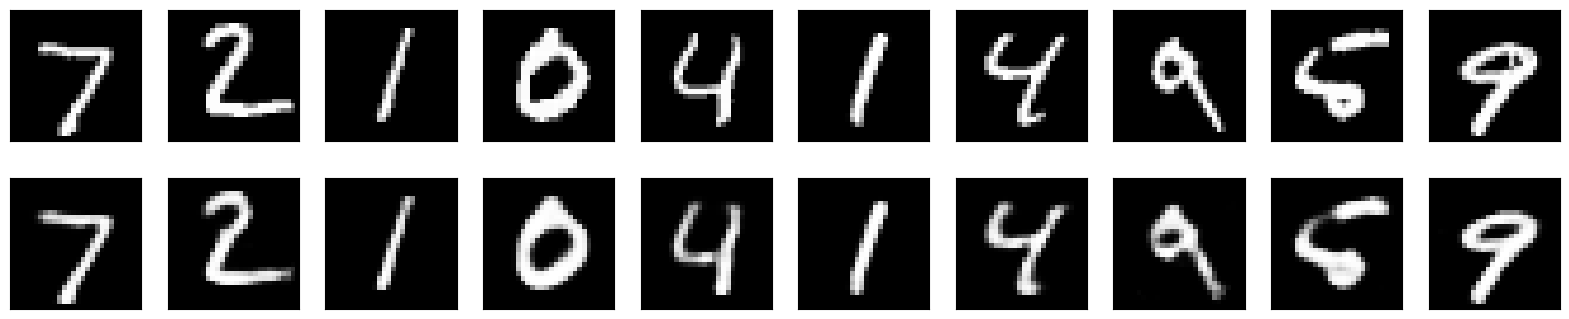

In [18]:

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 4))
for i in range(n):
    # 顯示原始數據
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#     顯示重建數據
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
# 假设 x_test 是你的测试数据集
encoded_imgs = encoder.predict(x_test)

4/4 [==============================] - 0s 2ms/step


2024-05-24 02:06:29.945923: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:06:29.945952: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:06:29.945957: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:06:29.945961: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:06:29.945972: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:06:29.945977: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:06:29.945981: W tensorflow/core/grappler/optimizers/meta_optimizer.cc:163] TF_ENABLE_AUTO_MIXED_PRECISION has no effect.
2024-05-24 02:06:29.945985: W tensorflow/core/grappler/

In [34]:
from sklearn.decomposition import PCA

# 初始化 PCA，设置降维后的主成分数为2
pca = PCA(n_components=2)
encoded_imgs_2d = pca.fit_transform(encoded_imgs)  # 对编码后的图片应用PCA


Text(0.5, 1.0, 'PCA of Encoded Images with Labels')

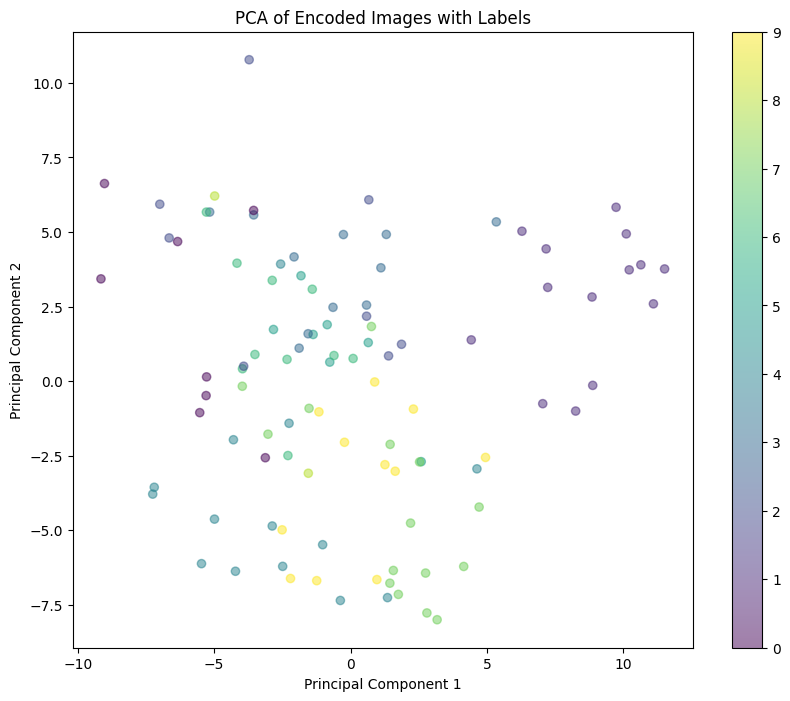

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(encoded_imgs_2d[:, 0], encoded_imgs_2d[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)  # 显示颜色条
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Encoded Images with Labels')


## Application of AE : clustering, similarity analysis, anomaly detection(1 class classification), denoise, feature extraction.